# ADSP 31014 IP02 Analysis Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import Regression
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf
import statsmodels.api as sm
import numpy as np
from scipy.stats import f, poisson, chi2, gaussian_kde
import seaborn as sb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import (norm, shapiro, anderson, t)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,StrMethodFormatter)
import sys
import seaborn as sns
#import dataframe_image as dfi

### 1. Exploratory Data Analysis

In [2]:
df = pd.read_excel('UnemploymentDataset.xlsx')

In [3]:
df.head()

,DATE,UNRATE,ICT_INVESTMENT,IP_INVESTMENT,GDPC1,INFLATION_ADJ,INFLATION_NOT_ADJ,CPIAUCSL,BBKMGDP,FEDFUNDS,LFPR,LFP_TOTAL,LFP_MEN_20YEARSANDOLDER,LFP_WOMEN_20YEARSANDOLDER,LFP_16TO19YEARSOLD,LFP_WHITE,LFP_BLACKORAFRICANAMERICAN,LFP_ASIAN,LFP_HISPANICORLATINO
0,2014-01-01,6.6,640.370,351.139,17953974.0,0.2,1.6,235.288,-4.510907,0.07,62.9,62.9,72.0,58.6,33.1,63.2,60.6,63.9,65.9
1,2014-02-01,6.7,640.370,351.139,17953974.0,0.1,1.1,235.547,-0.381823,0.07,62.9,62.9,71.9,58.8,32.5,63.2,60.9,63.9,66.0
2,2014-03-01,6.7,640.370,351.139,17953974.0,0.2,1.5,236.028,4.493396,0.08,63.1,63.1,72.1,58.8,33.9,63.3,61.3,64.3,66.1
3,2014-04-01,6.2,656.511,359.361,18185911.0,0.2,2.0,236.468,6.032151,0.09,62.8,62.8,71.8,58.5,33.3,63.0,61.0,63.6,65.6
4,2014-05-01,6.3,656.511,359.361,18185911.0,0.2,2.1,236.918,6.651235,0.09,62.9,62.9,71.9,58.6,33.7,63.1,60.8,63.8,65.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        130 non-null    datetime64[ns]
 1   UNRATE                      130 non-null    float64       
 2   ICT_INVESTMENT              129 non-null    float64       
 3   IP_INVESTMENT               129 non-null    float64       
 4   GDPC1                       129 non-null    float64       
 5   INFLATION_ADJ               130 non-null    float64       
 6   INFLATION_NOT_ADJ           130 non-null    float64       
 7   CPIAUCSL                    130 non-null    float64       
 8   BBKMGDP                     129 non-null    float64       
 9   FEDFUNDS                    130 non-null    float64       
 10  LFPR                        130 non-null    float64       
 11  LFP_TOTAL                   130 non-null    float64       

In [5]:
df['BBKMGDP']=pd.to_numeric(df['BBKMGDP'],errors='coerce')

#### Summary Statistics

In [6]:
df.describe()

,DATE,UNRATE,ICT_INVESTMENT,IP_INVESTMENT,GDPC1,INFLATION_ADJ,INFLATION_NOT_ADJ,CPIAUCSL,BBKMGDP,FEDFUNDS,LFPR,LFP_TOTAL,LFP_MEN_20YEARSANDOLDER,LFP_WOMEN_20YEARSANDOLDER,LFP_16TO19YEARSOLD,LFP_WHITE,LFP_BLACKORAFRICANAMERICAN,LFP_ASIAN,LFP_HISPANICORLATINO
count,130,130.000000,129.000000,129.000000,1.290000e+02,130.000000,130.000000,130.000000,129.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0000
mean,2019-05-17 08:51:41.538461440,4.825385,878.382047,548.911953,2.052176e+07,0.227692,2.767692,263.407600,2.447469,1.583538,62.551538,62.551538,71.008462,58.287692,35.503077,62.481538,61.919231,63.786154,66.2200
min,2014-01-01 00:00:00,3.400000,640.370000,351.139000,1.795397e+07,-0.800000,-0.200000,234.747000,-71.477691,0.050000,60.100000,60.100000,68.500000,56.300000,29.800000,60.300000,58.500000,60.700000,63.1000
25%,2016-09-08 12:00:00,3.800000,716.368000,417.805000,1.906271e+07,0.100000,1.425000,241.317250,1.472769,0.100000,62.400000,62.400000,70.200000,58.100000,34.800000,62.100000,61.325000,63.100000,65.8000
50%,2019-05-16 12:00:00,4.300000,844.704000,533.230000,2.043164e+07,0.200000,2.100000,255.264500,2.634054,0.780000,62.700000,62.700000,71.500000,58.400000,35.600000,62.700000,62.050000,63.700000,66.2000
75%,2022-01-24 06:00:00,5.375000,1065.462000,687.792000,2.191922e+07,0.400000,3.200000,283.998750,3.834937,2.367500,62.900000,62.900000,71.700000,58.600000,36.400000,62.900000,62.600000,64.475000,66.7000
max,2024-10-01 00:00:00,14.800000,1218.208000,802.917000,2.338625e+07,1.200000,9.100000,315.454000,45.390700,5.330000,63.300000,63.300000,72.100000,59.300000,38.200000,63.300000,64.000000,65.900000,67.9000
std,NaN,1.720389,171.653218,146.133212,1.536212e+06,0.279816,2.232675,26.016675,9.868334,1.828775,0.542494,0.542494,0.841652,0.563215,1.297639,0.591121,0.947546,1.009394,0.7314


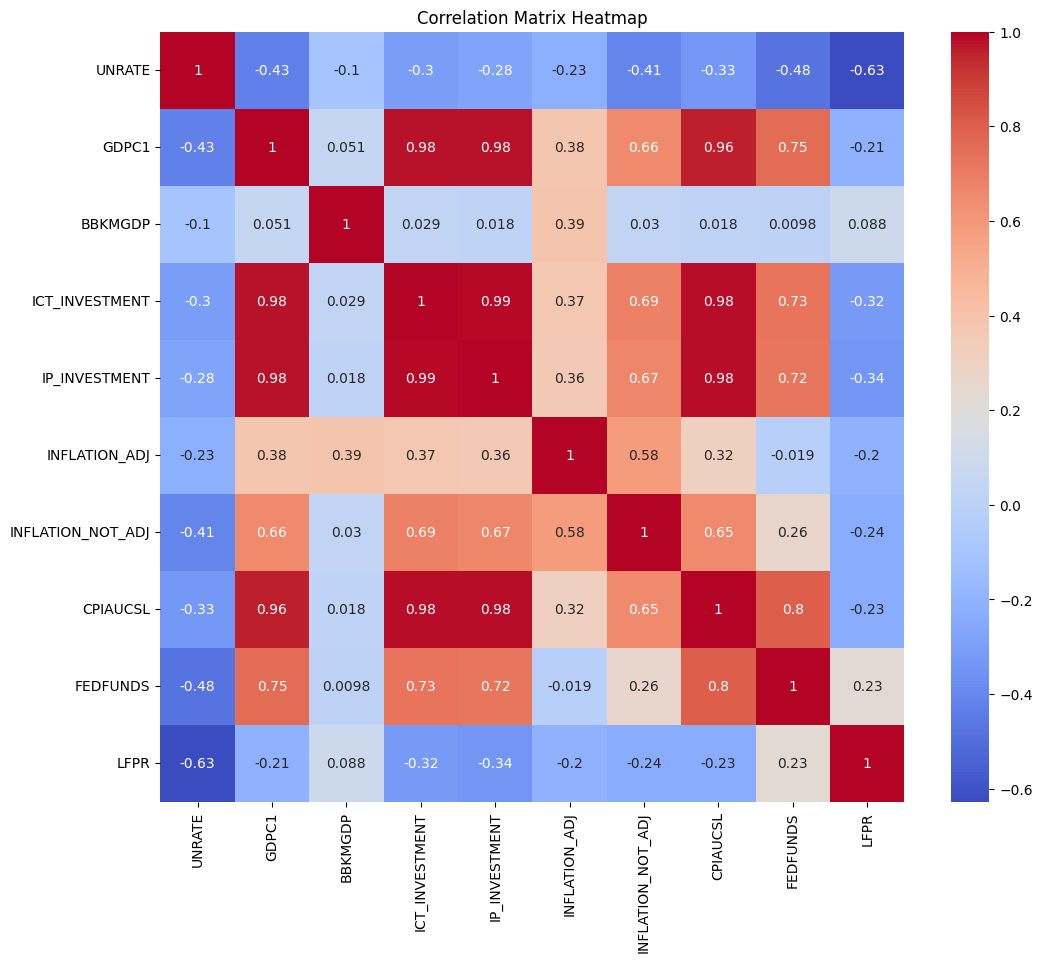

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[['UNRATE', 'GDPC1', 'BBKMGDP', 'ICT_INVESTMENT', 'IP_INVESTMENT', 'INFLATION_ADJ', 'INFLATION_NOT_ADJ', 'CPIAUCSL', 'FEDFUNDS', 'LFPR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Visualizations of the Variables

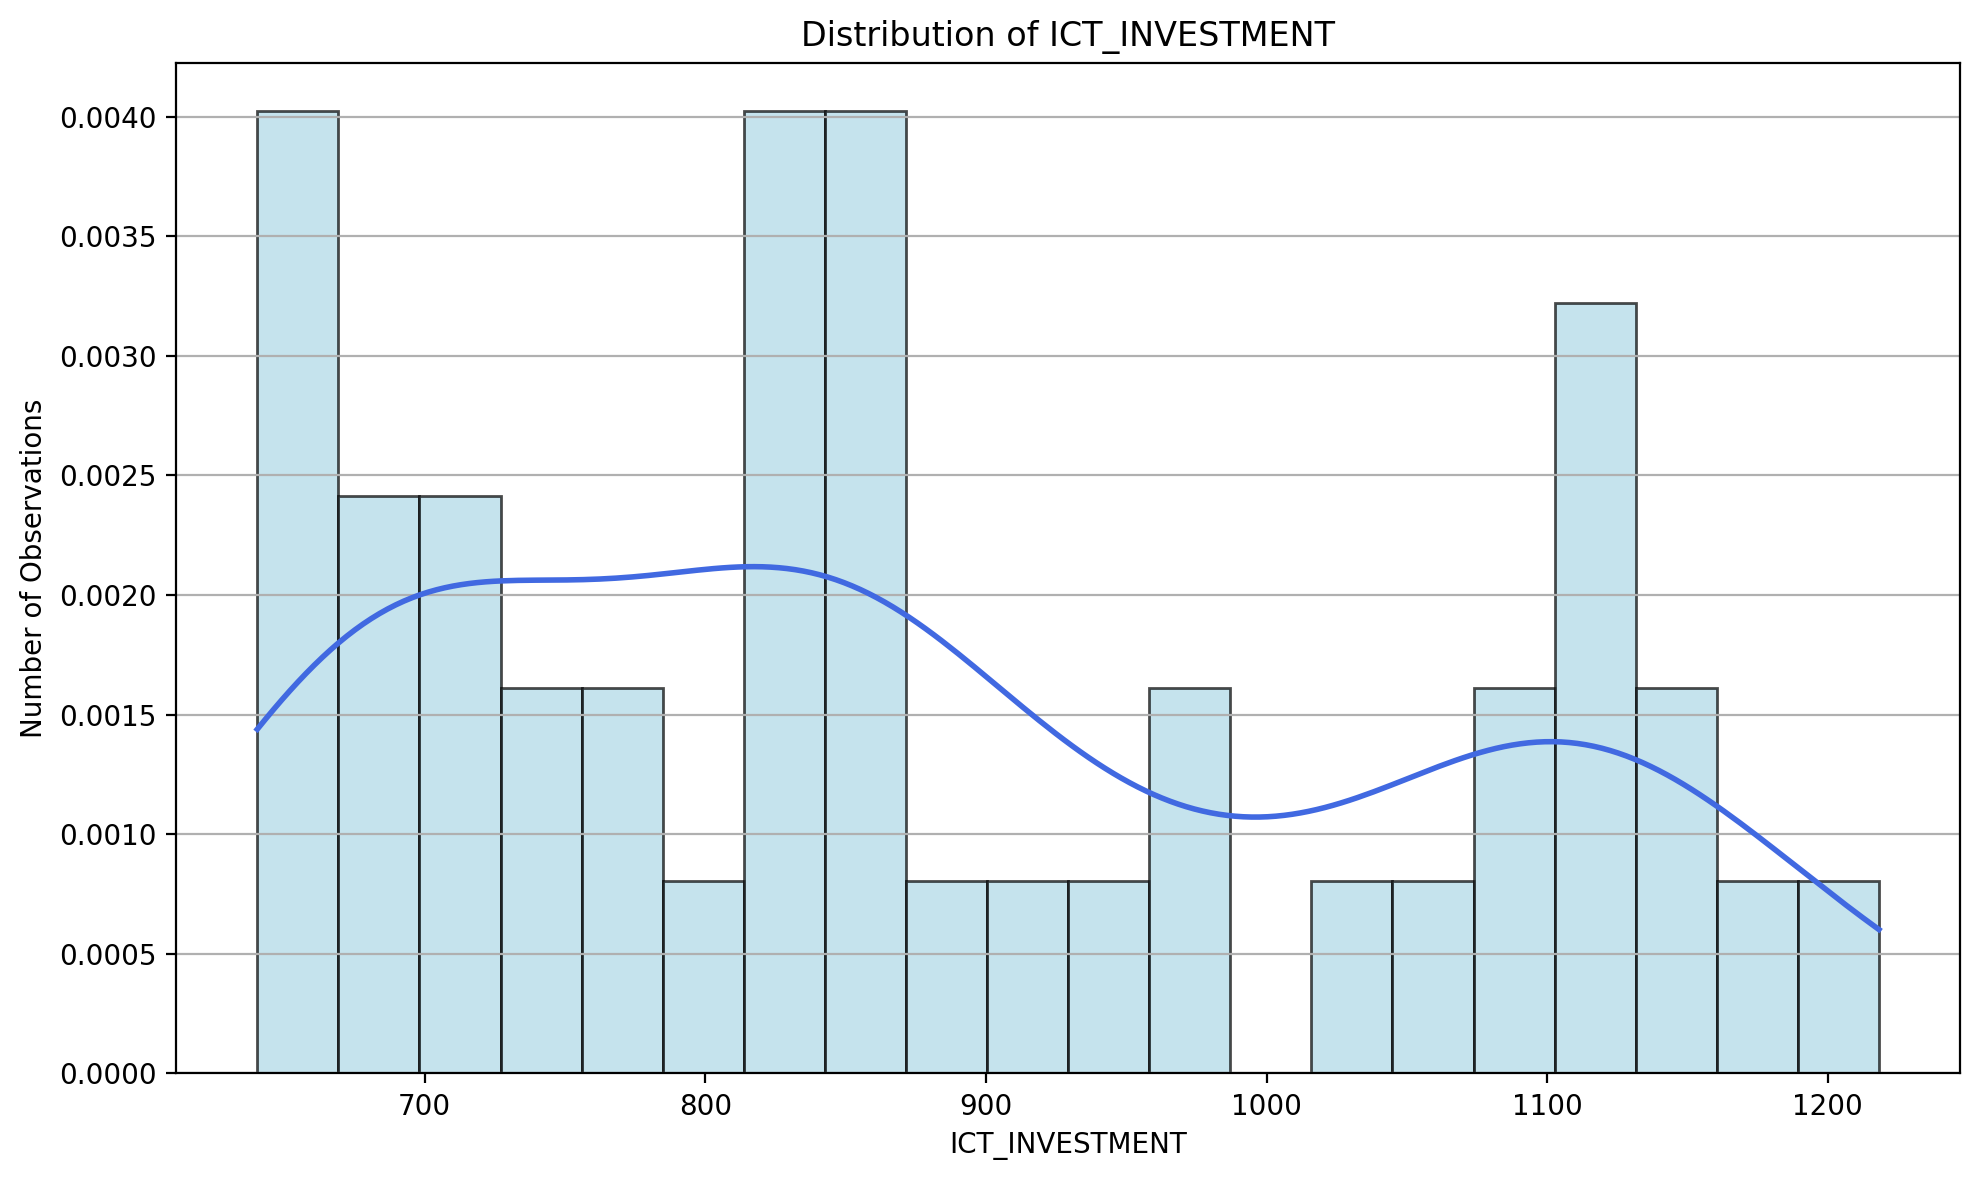

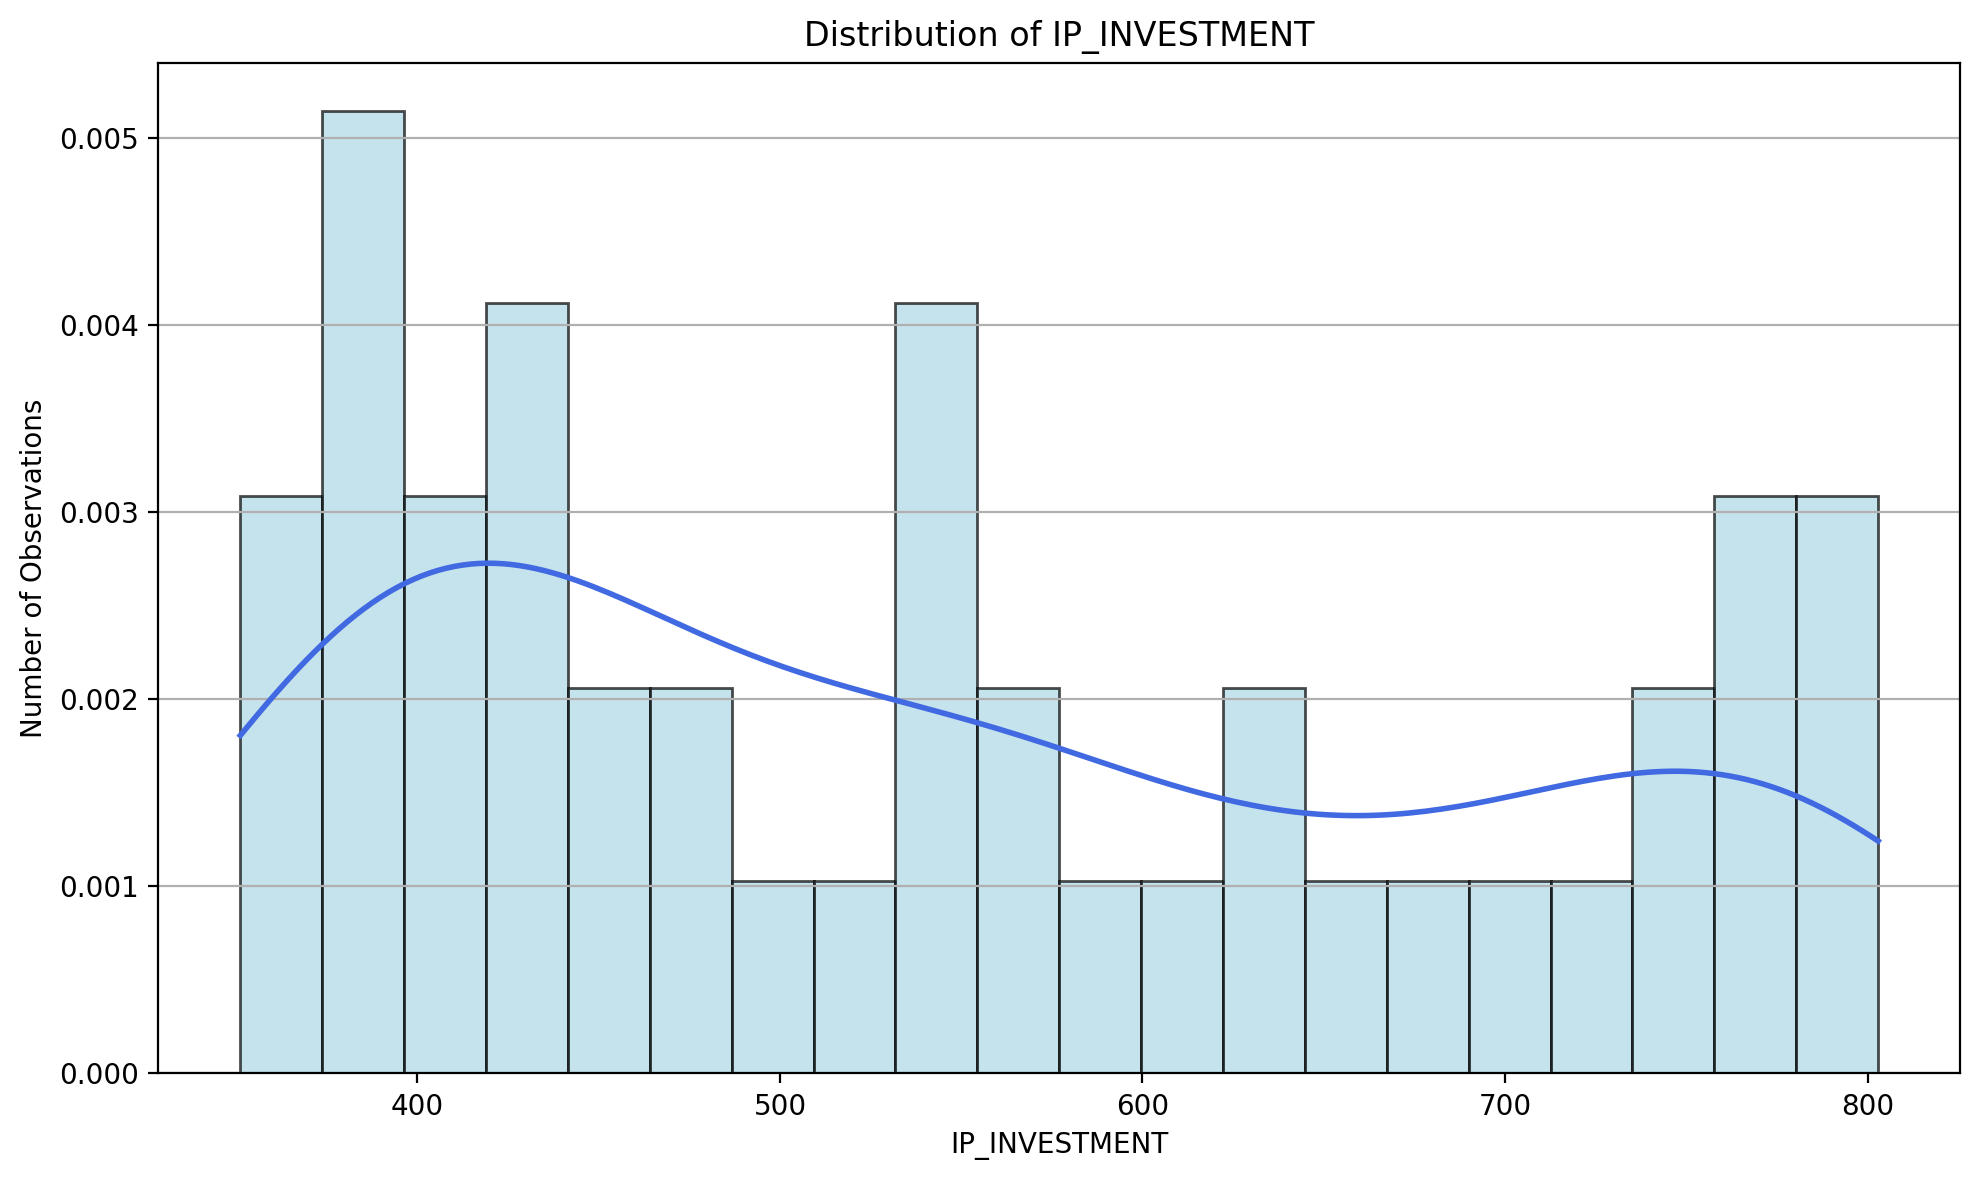

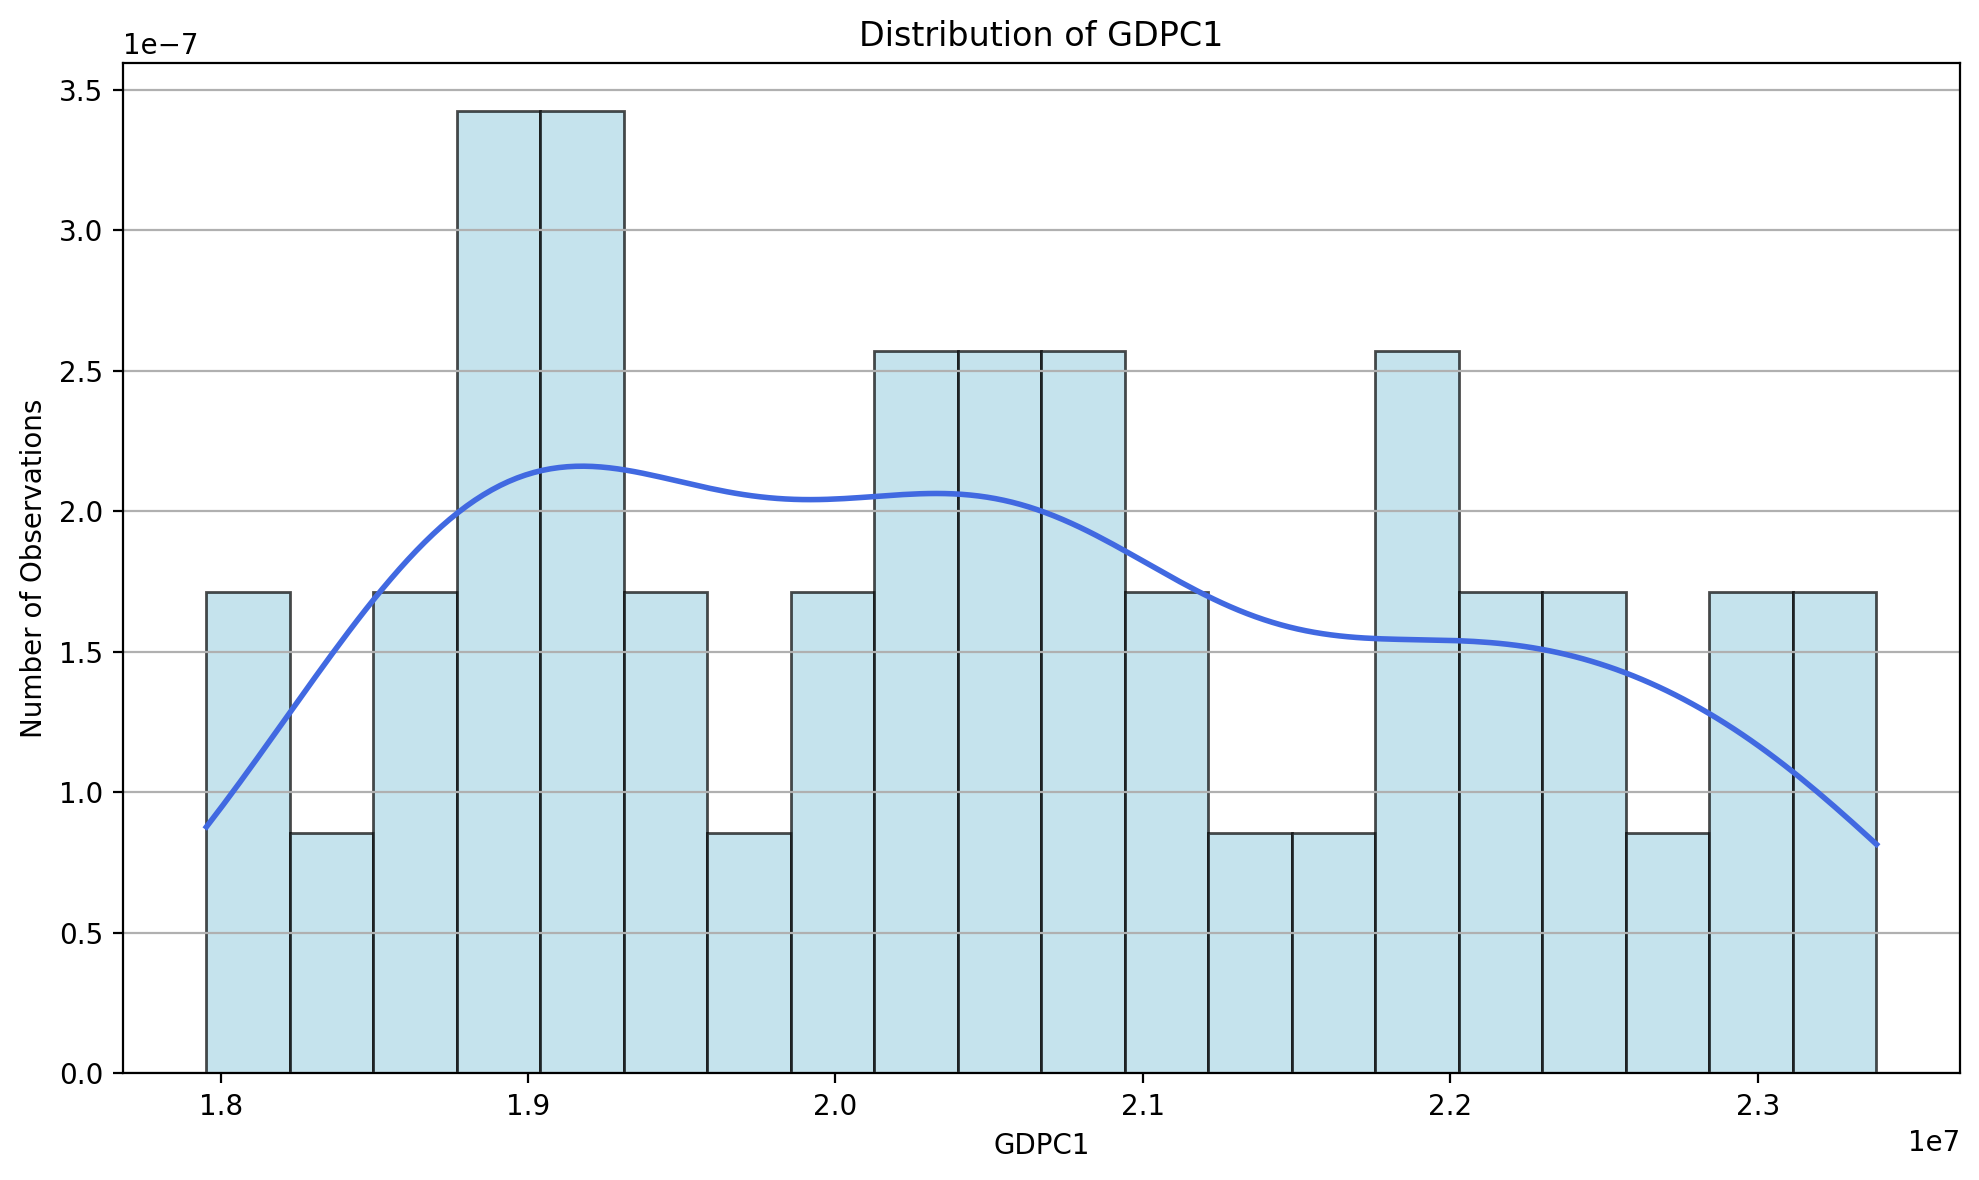

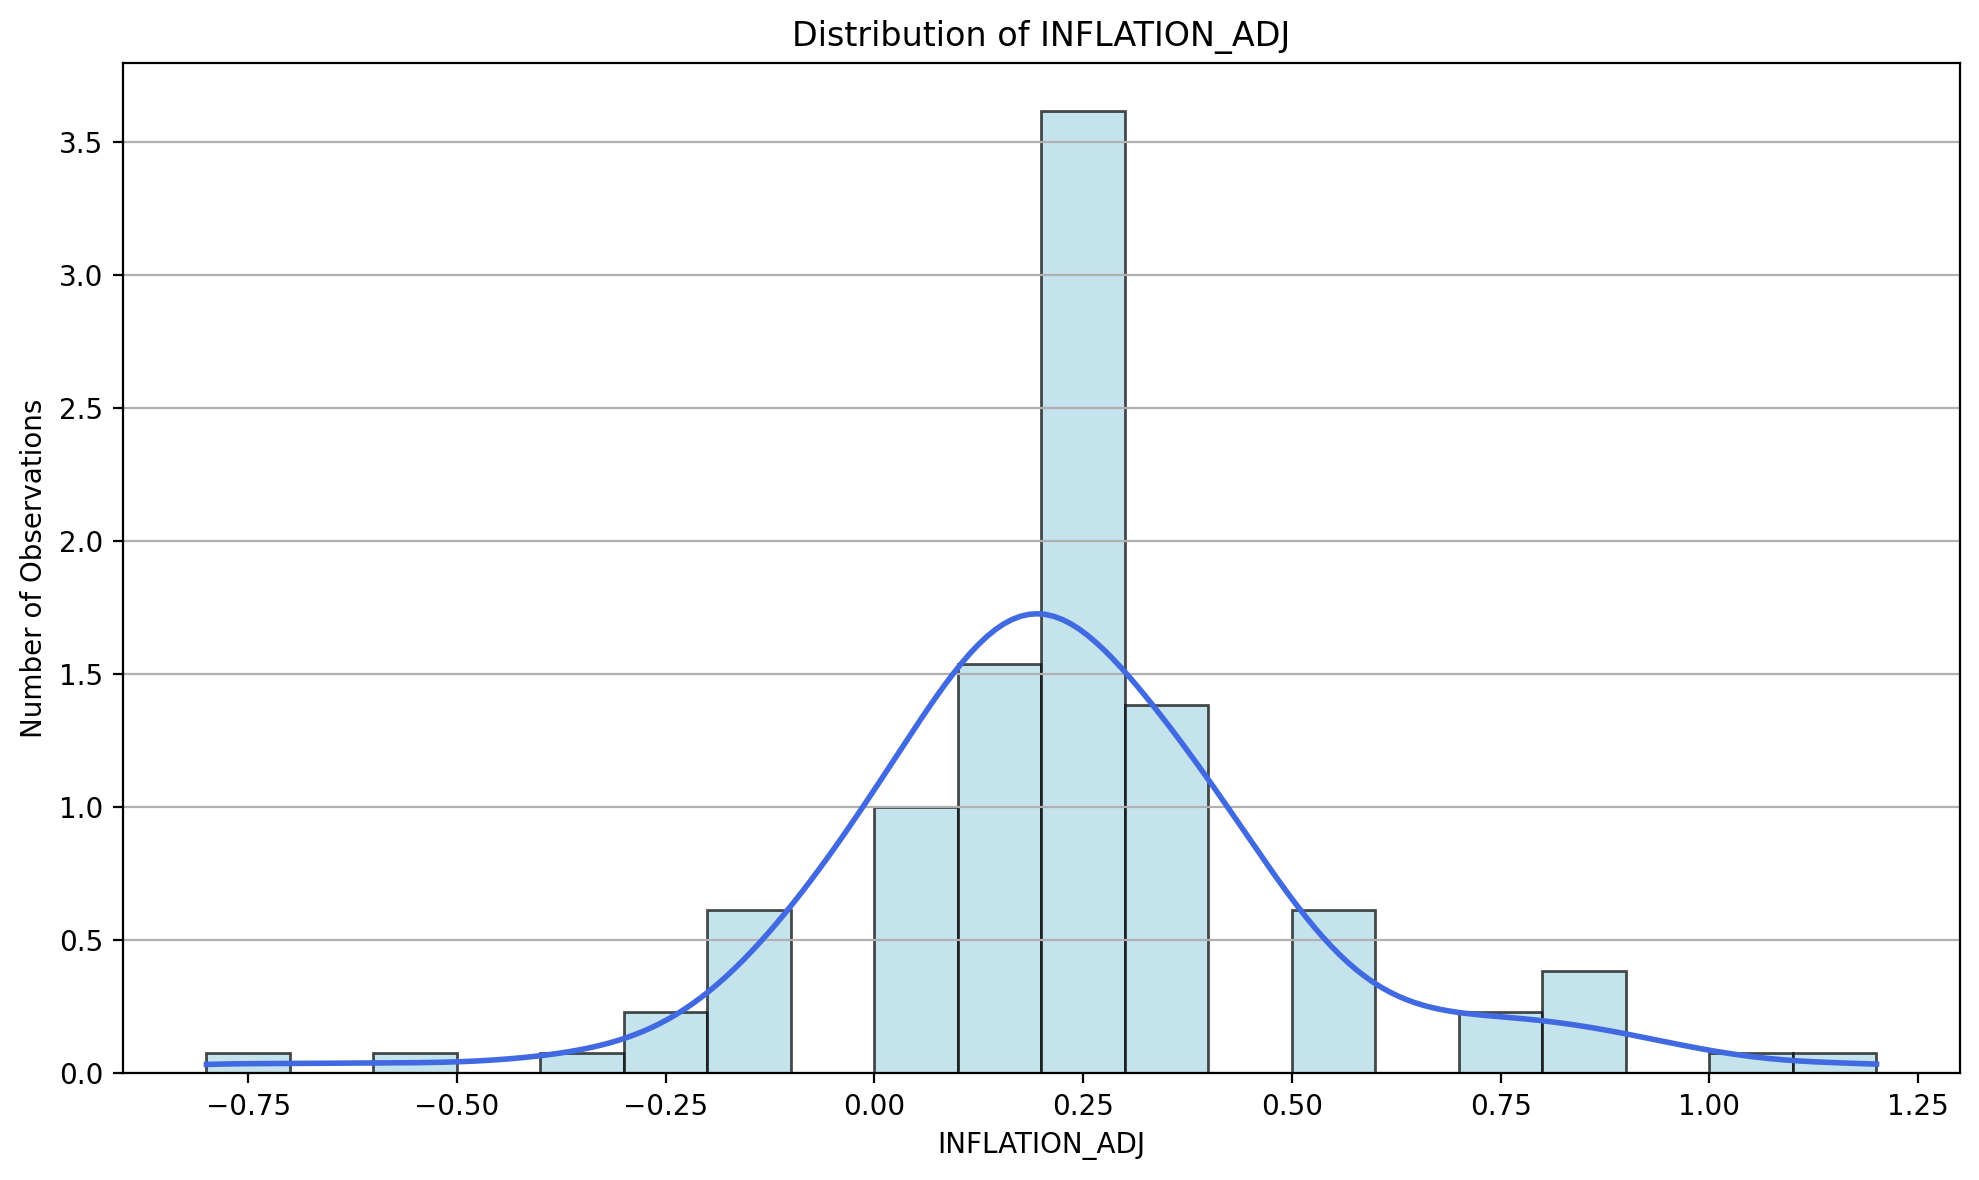

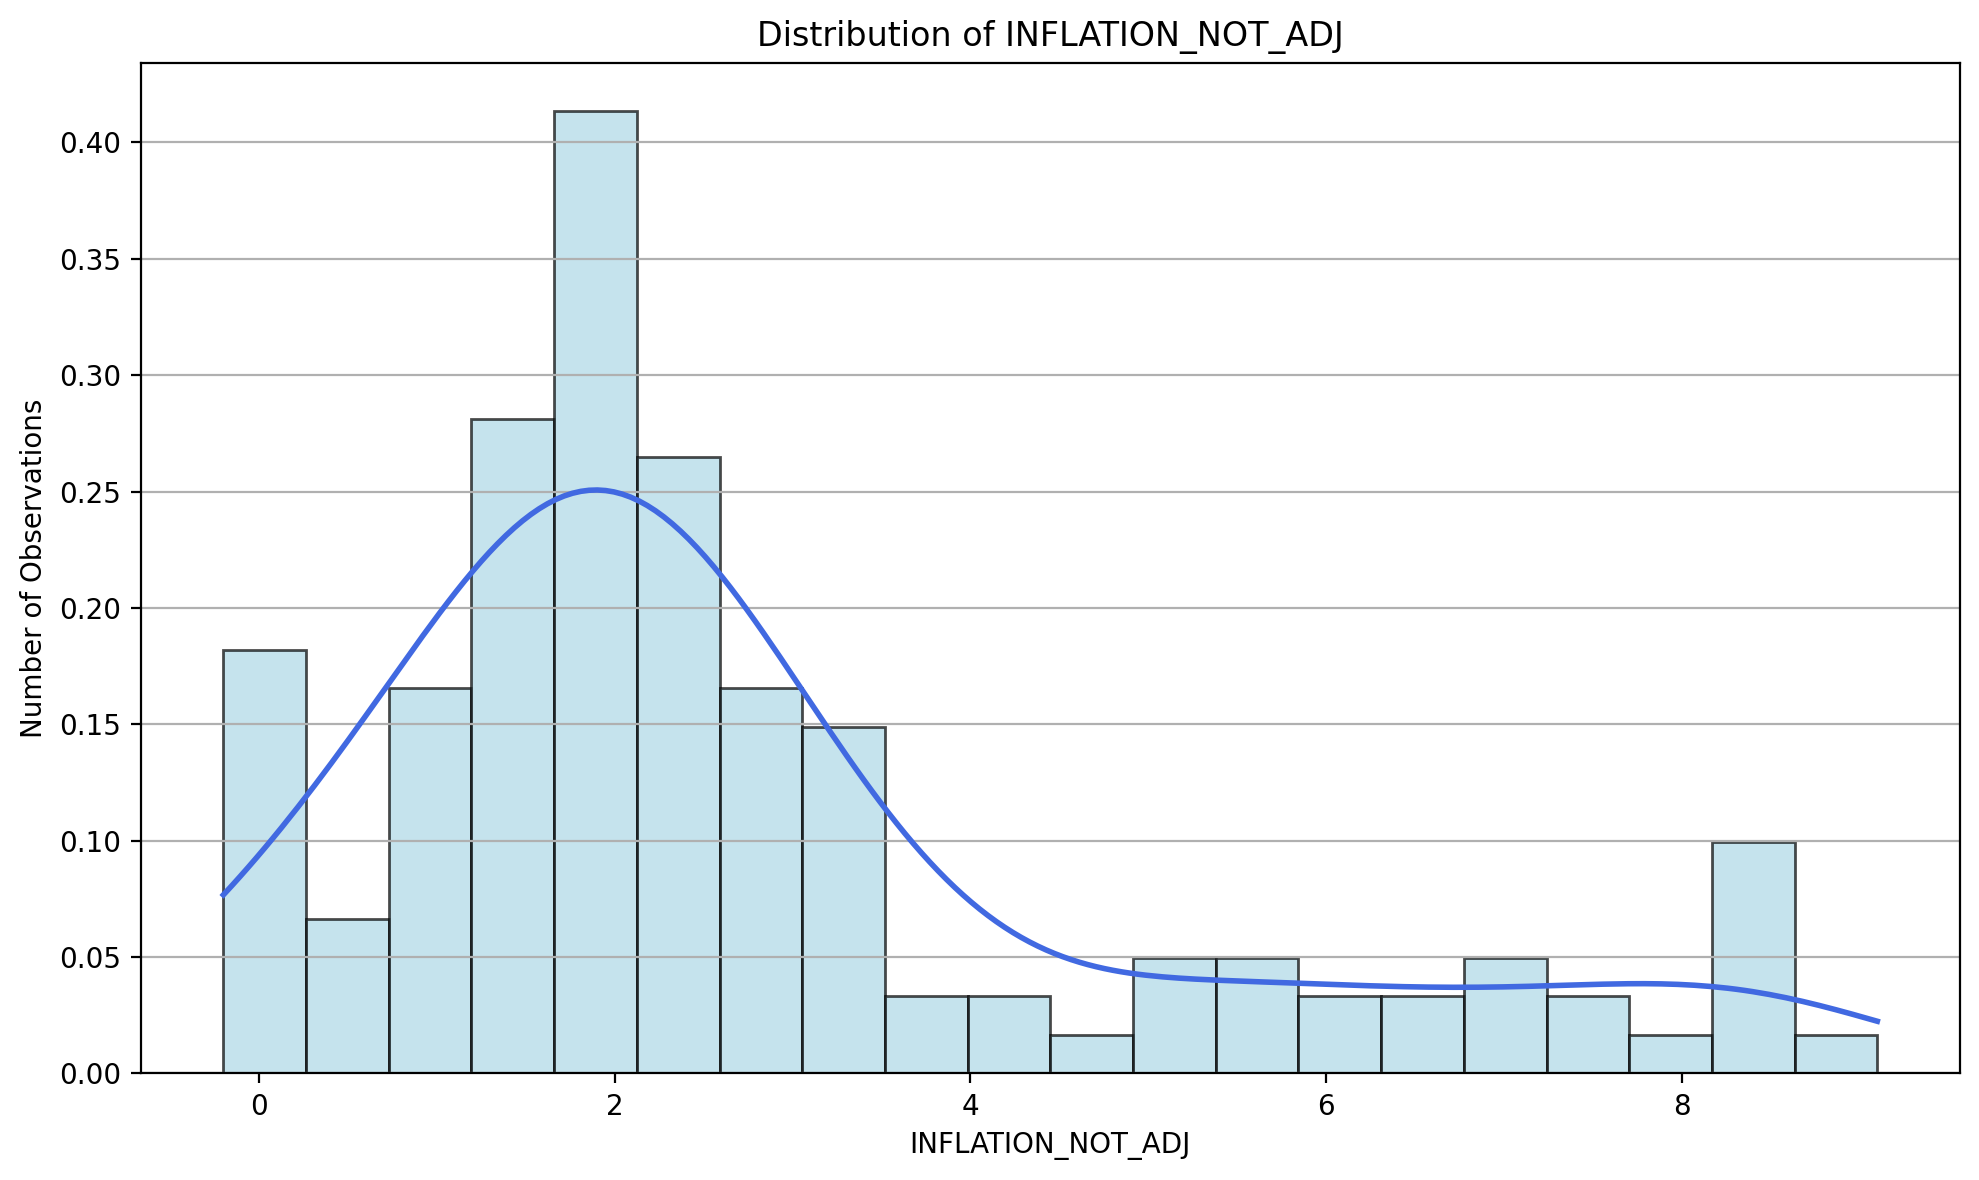

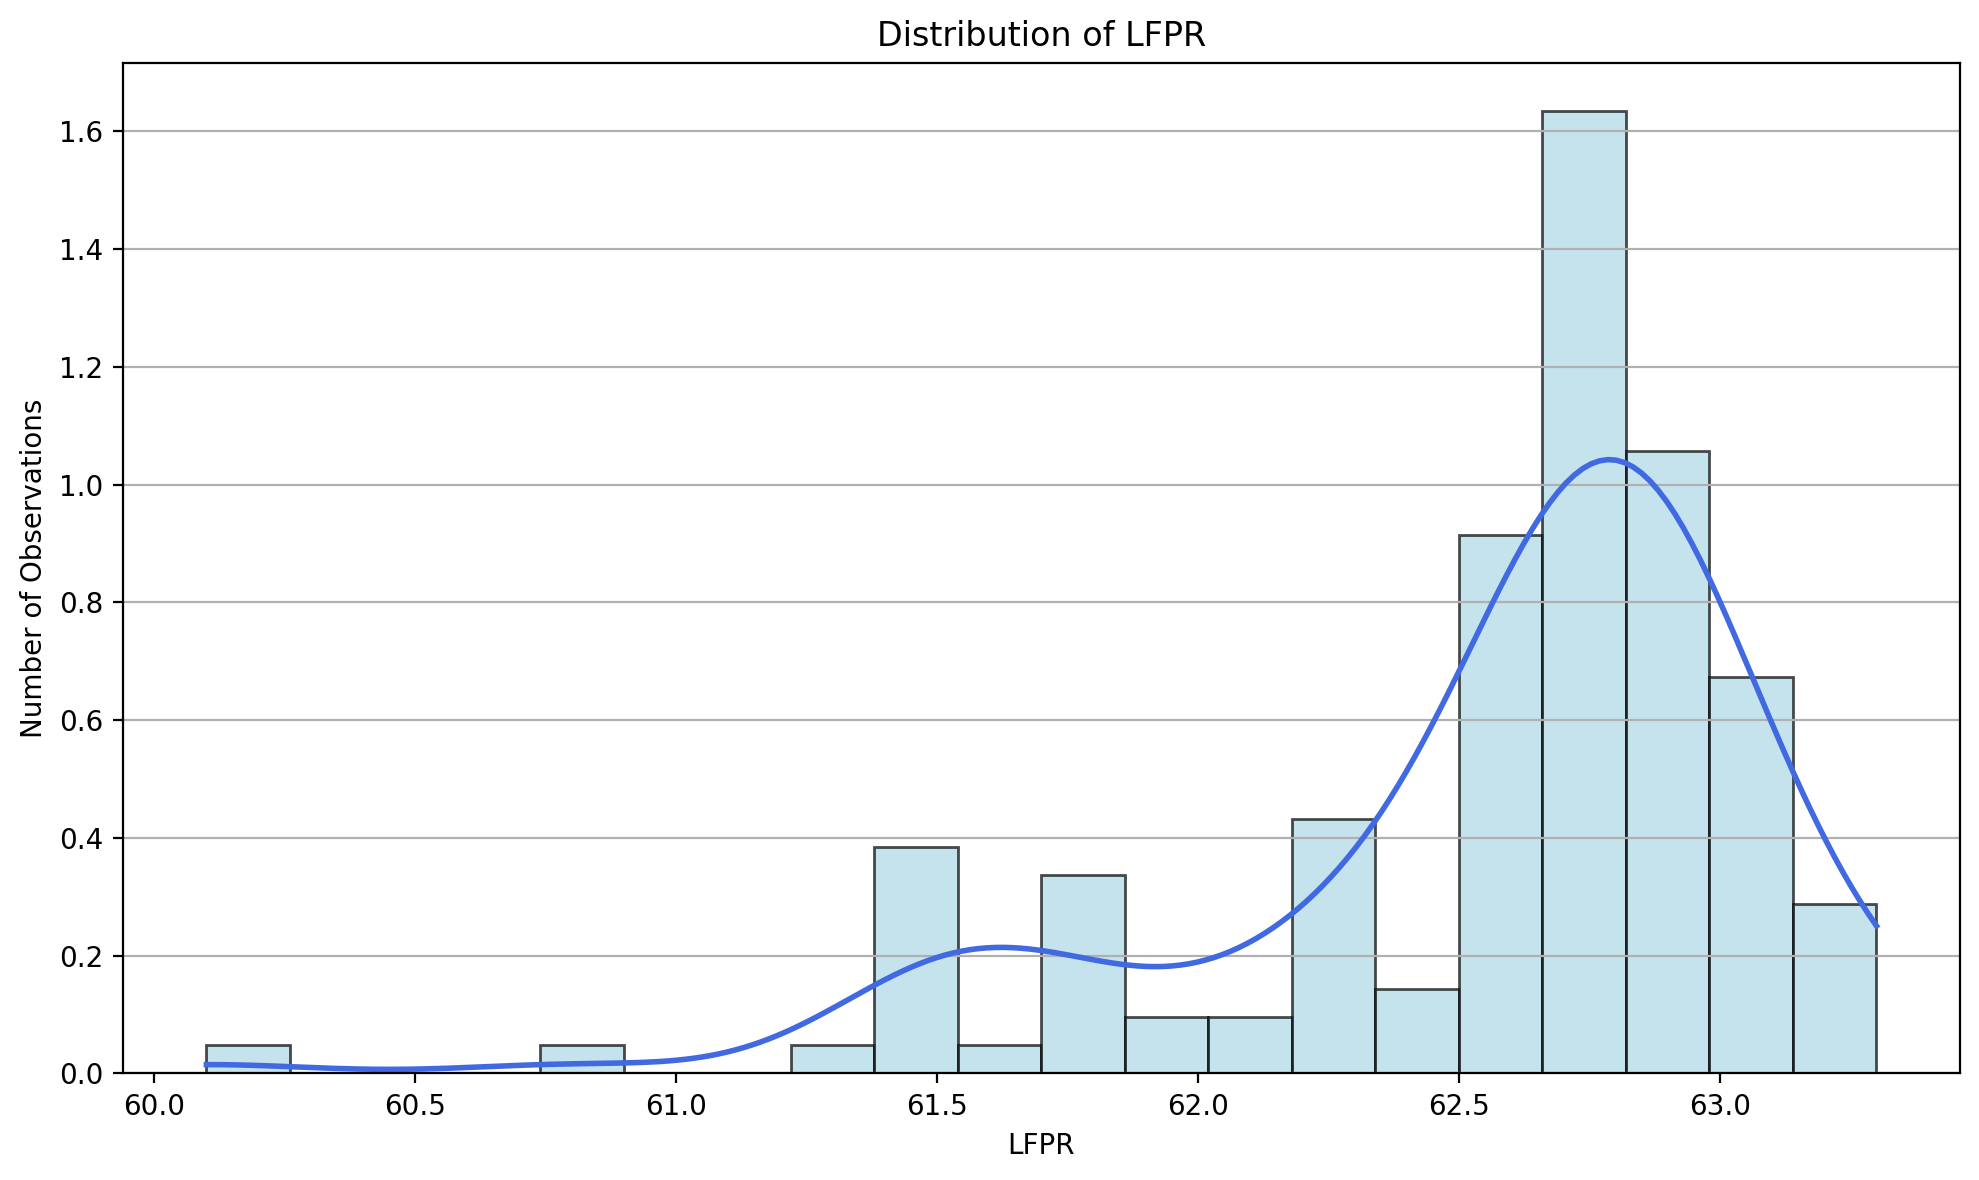

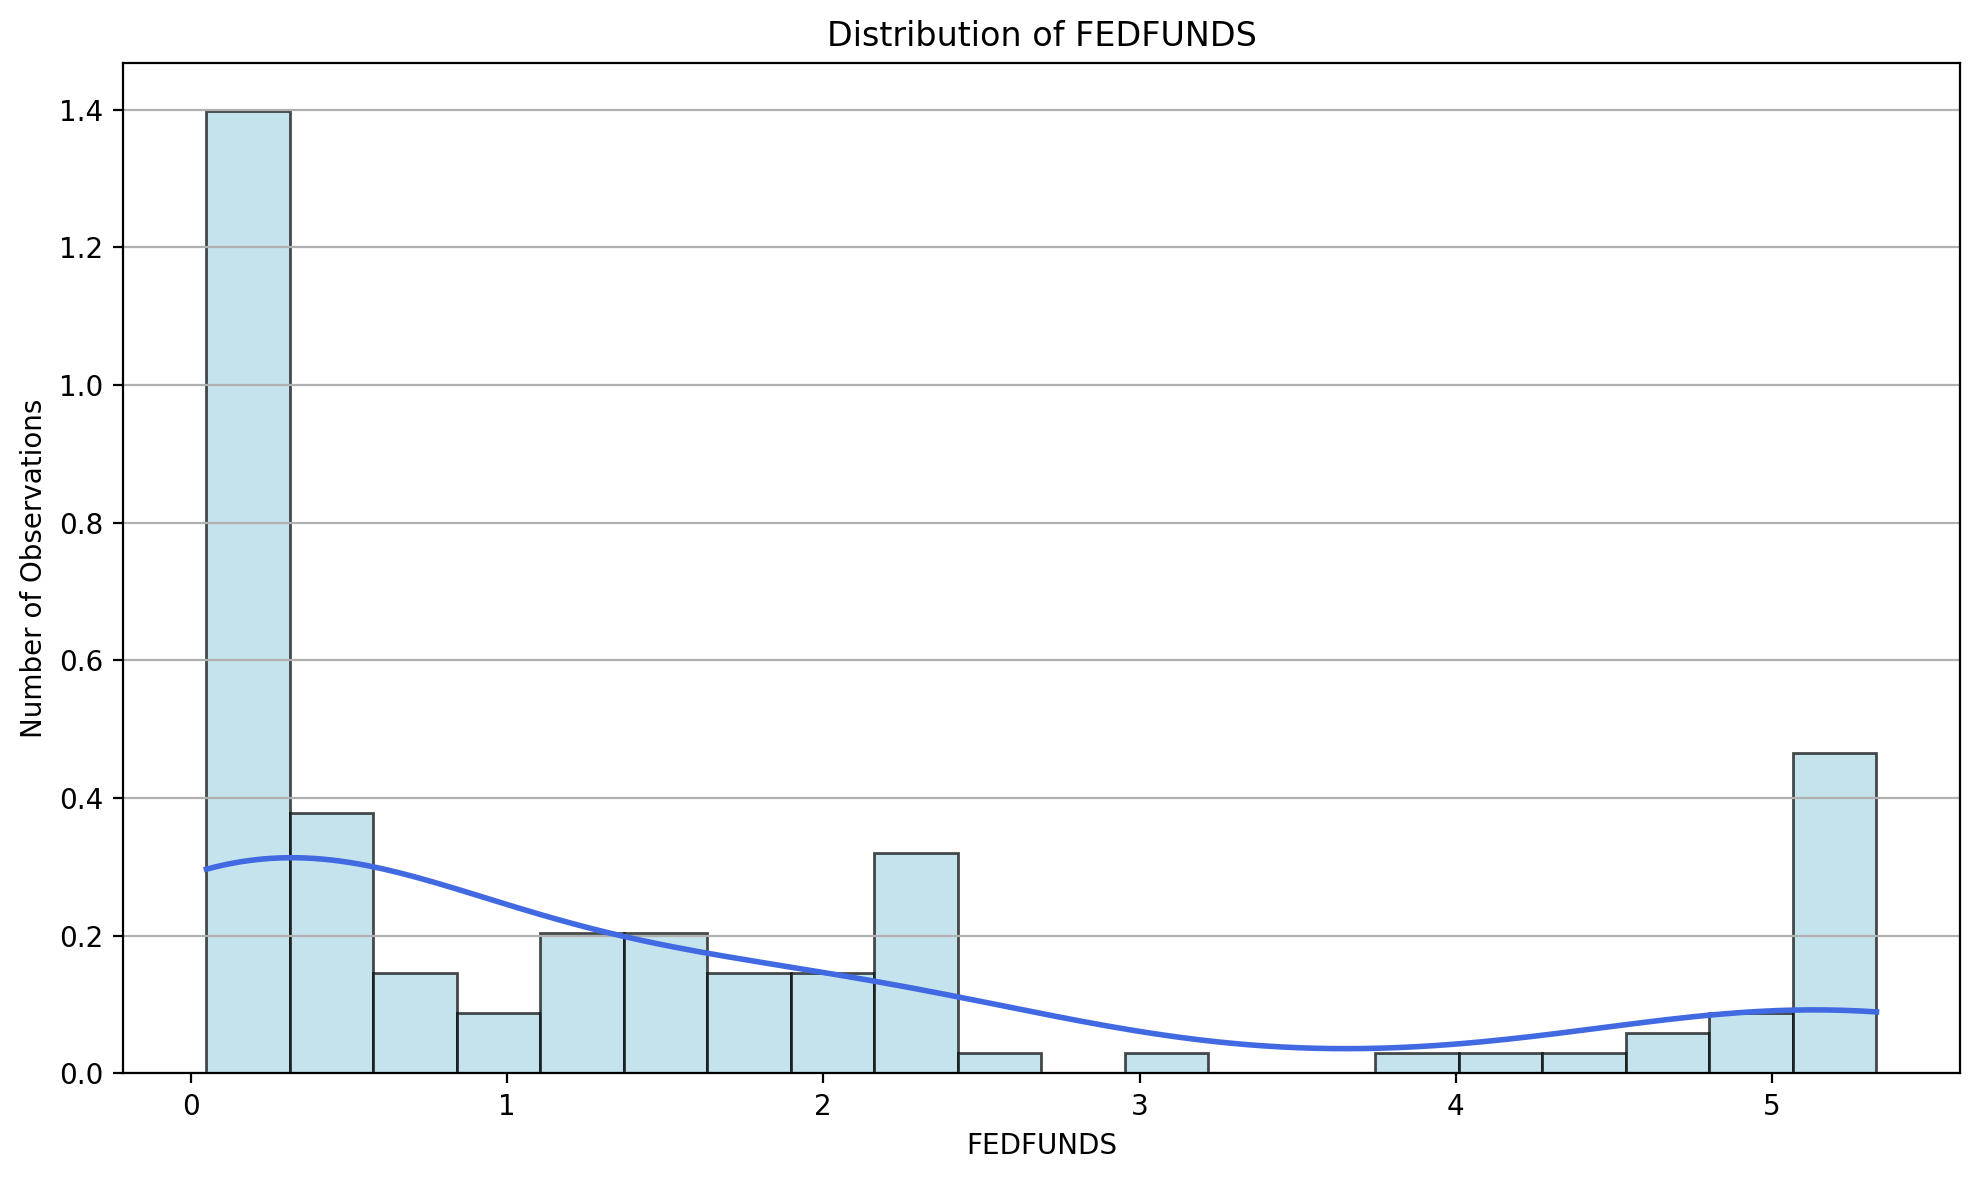

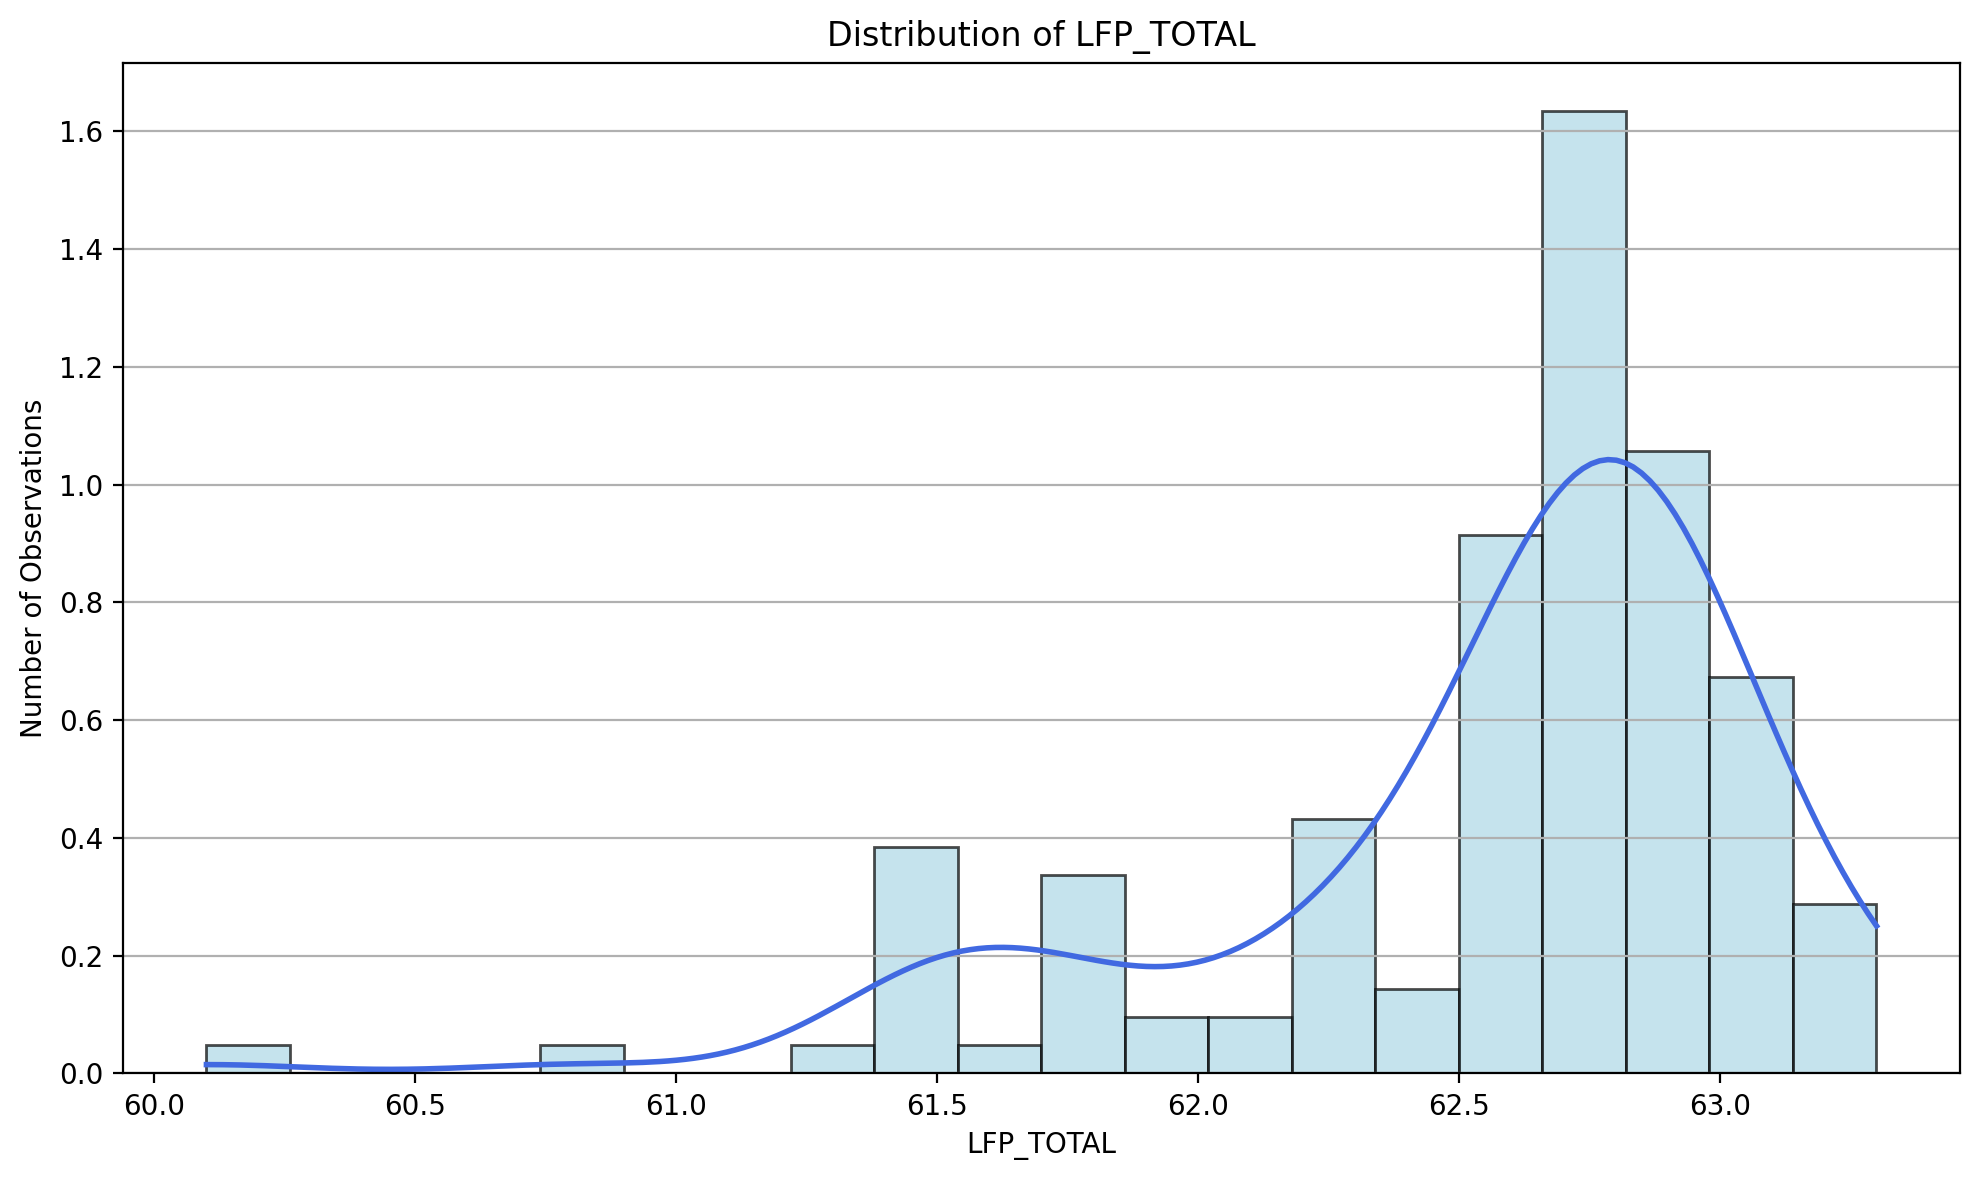

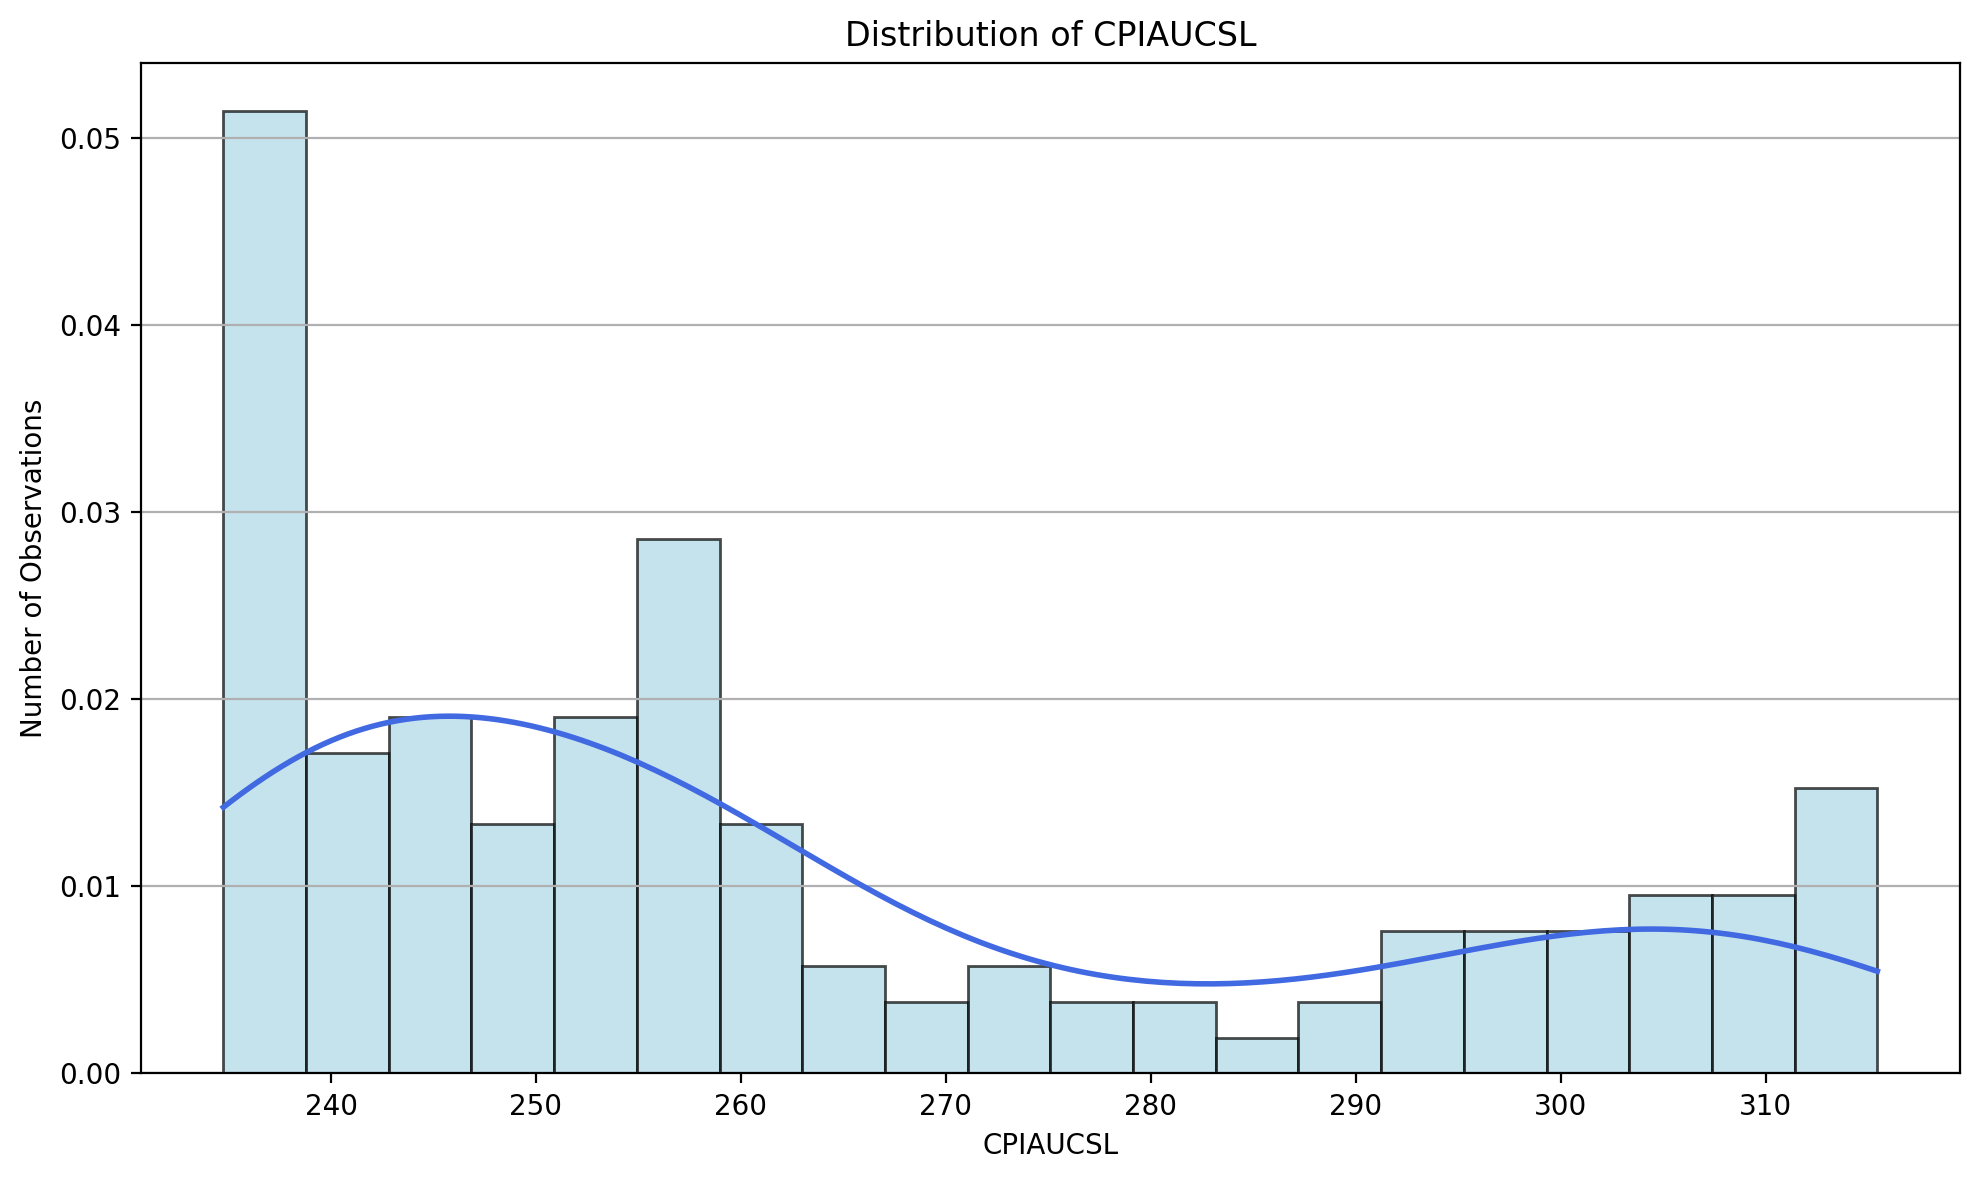

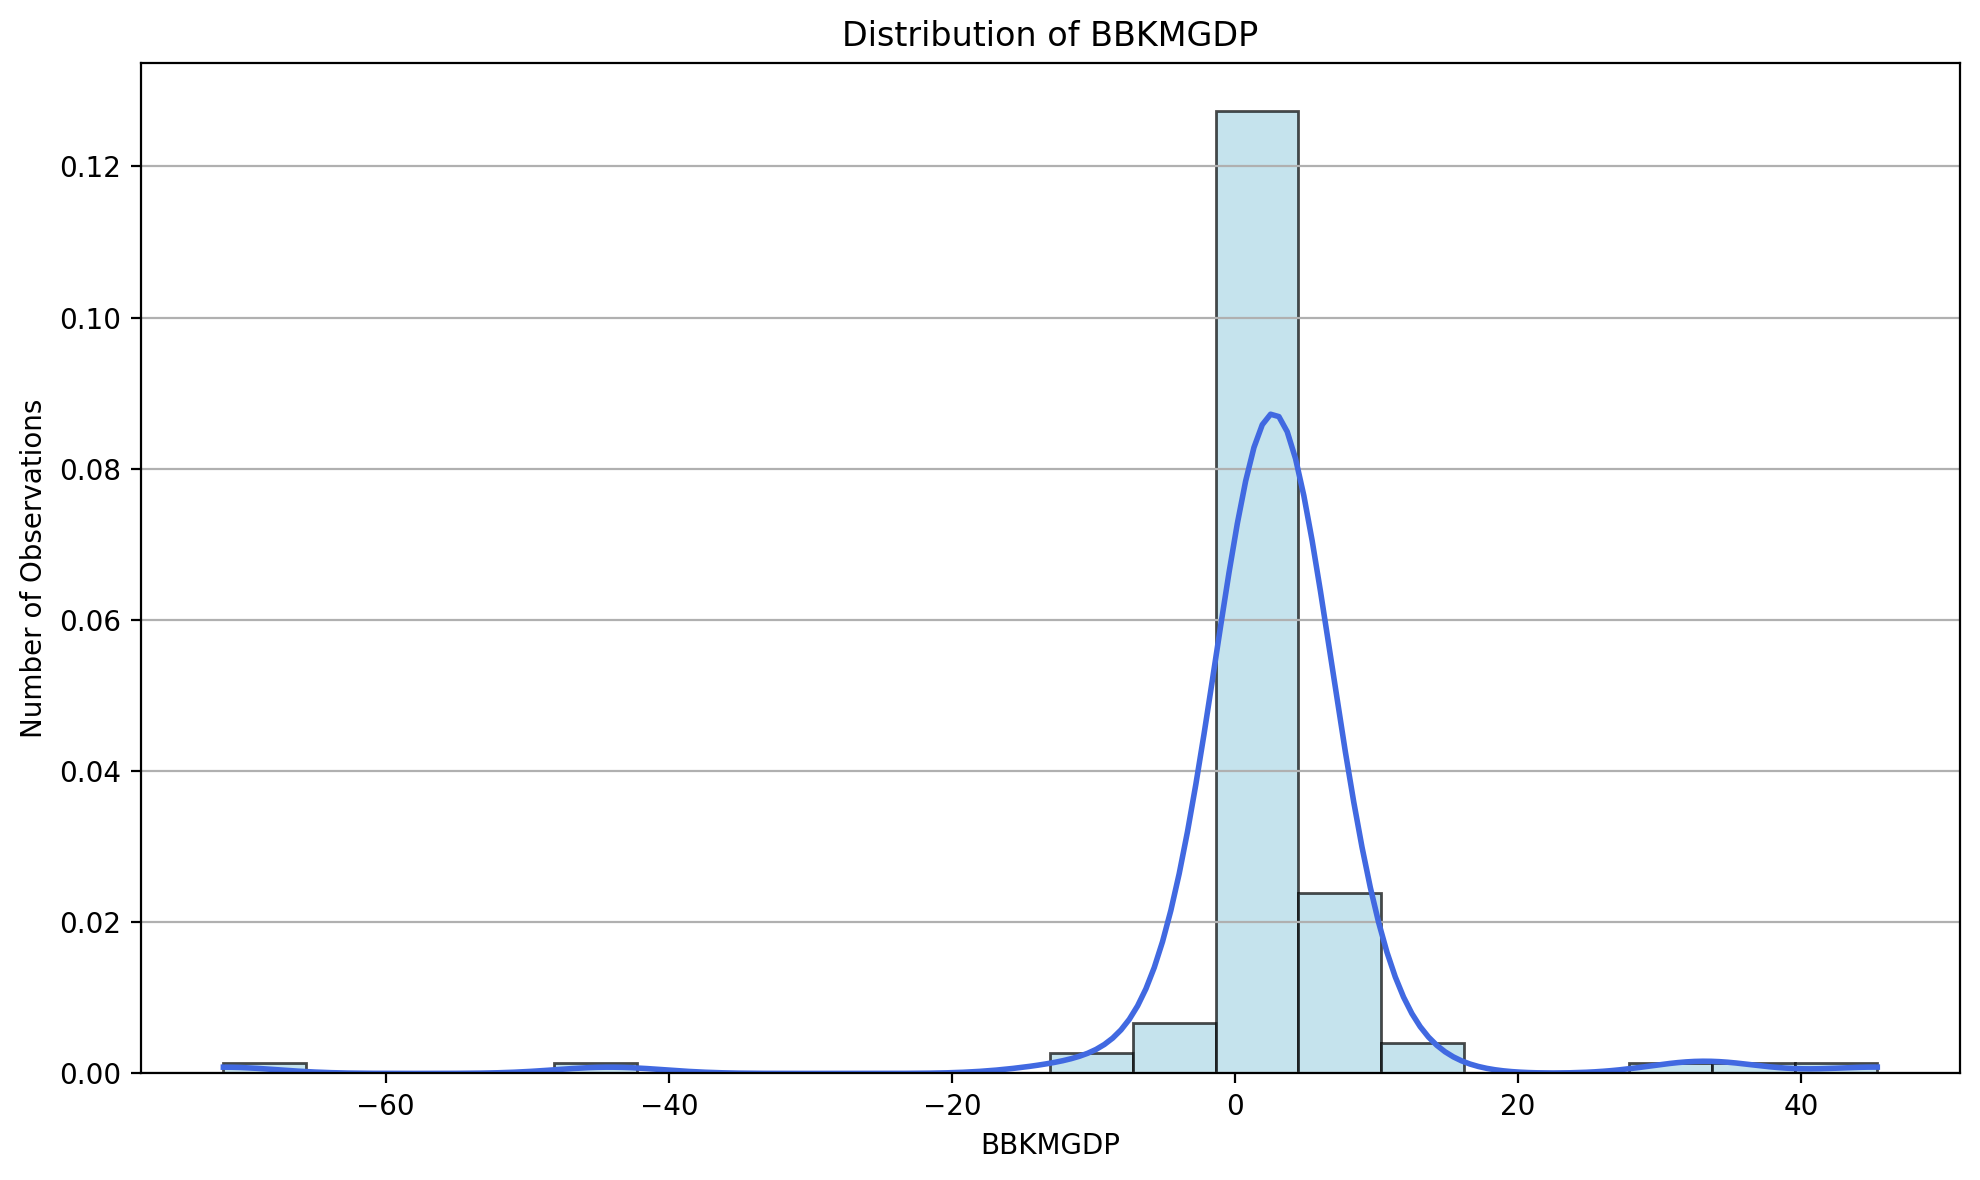

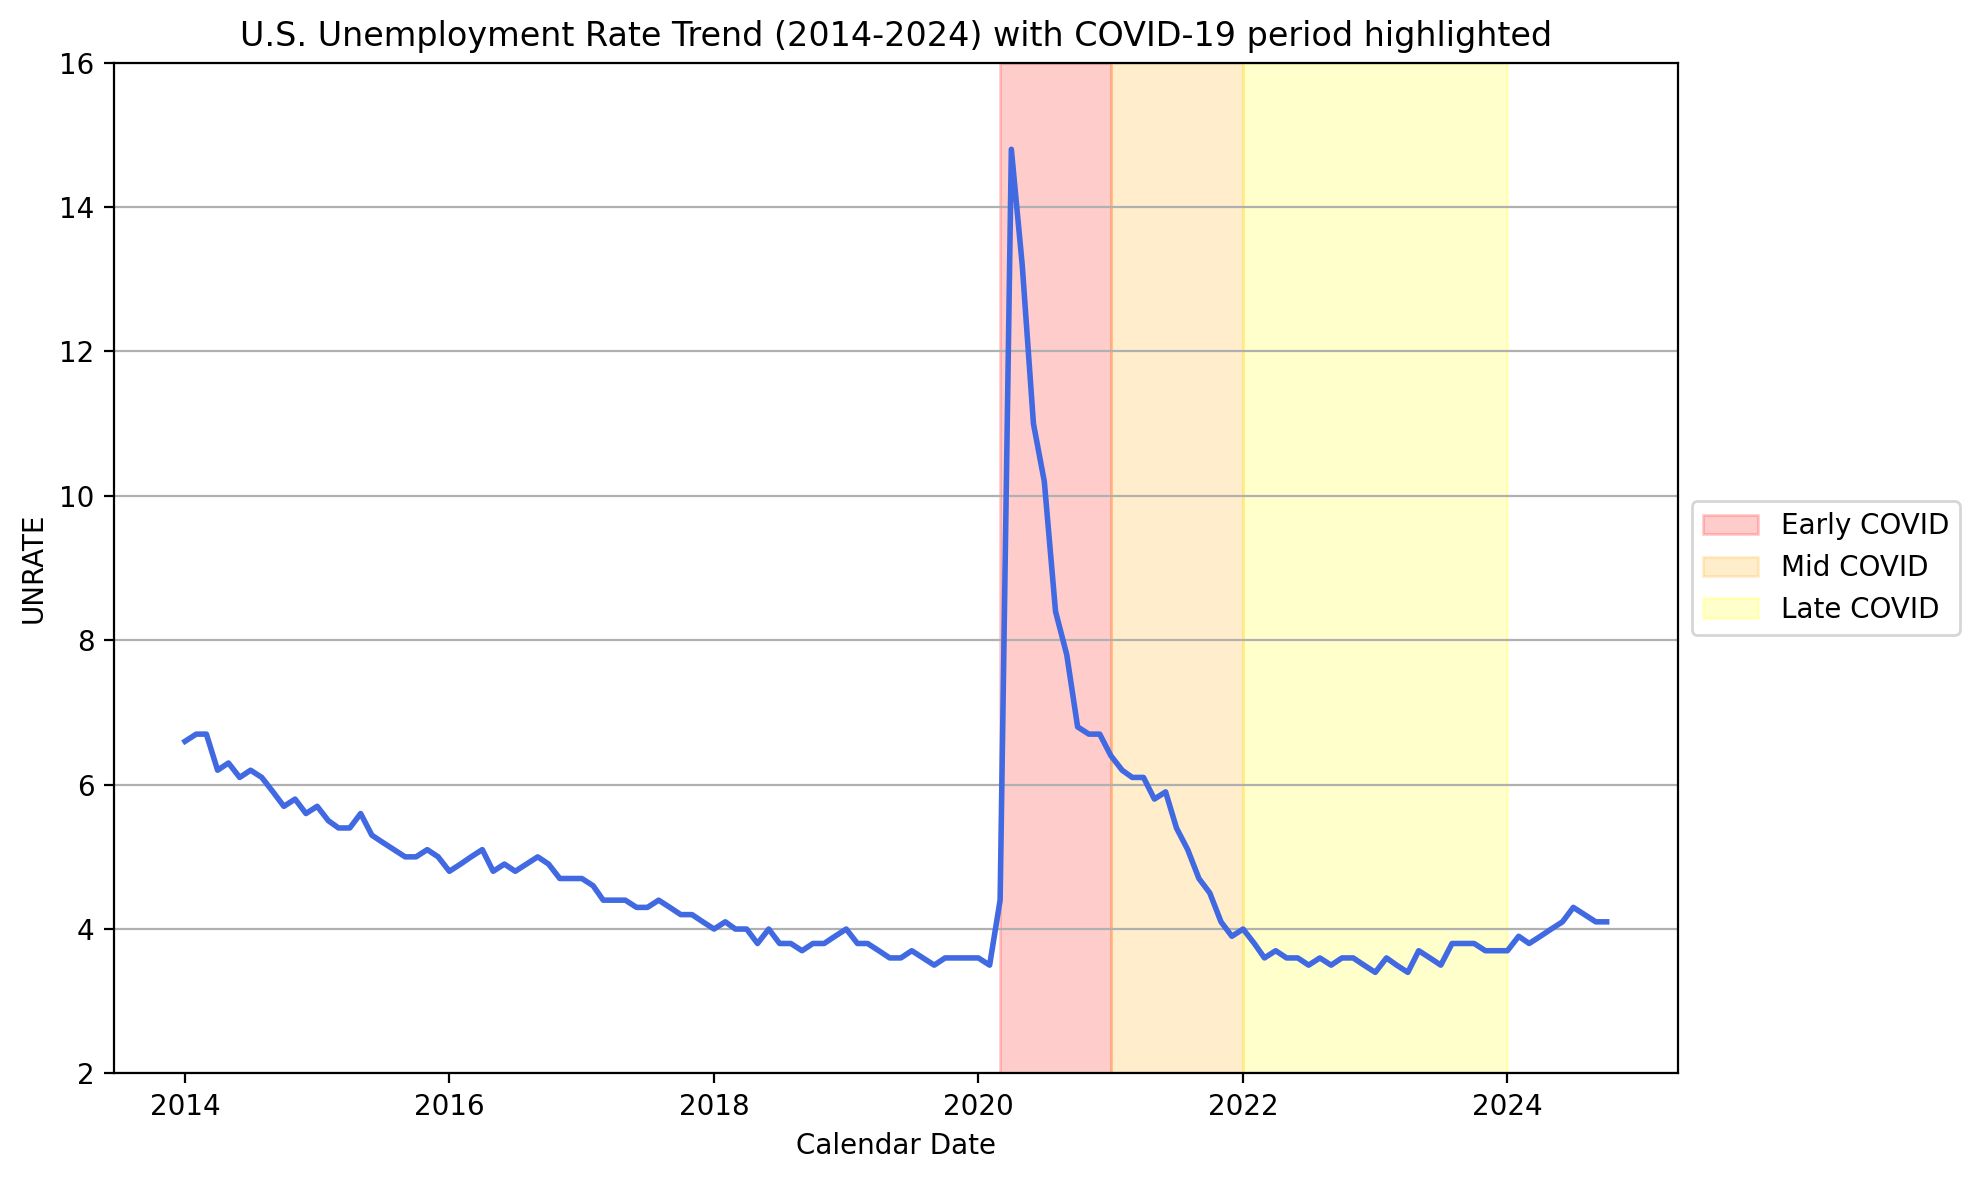

In [8]:
# Set display options for numpy and pandas
np.set_printoptions(precision=10, threshold=sys.maxsize)
np.set_printoptions(linewidth=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.options.display.float_format = '{:,.10f}'.format

# Load the dataset
df = pd.read_excel('UnemploymentDataset.xlsx')
df['BBKMGDP'] = pd.to_numeric(df['BBKMGDP'], errors='coerce')

# Define predictor names
predictor_name = [
    'ICT_INVESTMENT',
    'IP_INVESTMENT',
    'GDPC1',
    'INFLATION_ADJ',
    'INFLATION_NOT_ADJ',
    'LFPR',
    'FEDFUNDS',
    'LFP_TOTAL',
    'CPIAUCSL',
    'BBKMGDP'
]

# Create histograms for each predictor
for pred in predictor_name:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
    values = df[pred].dropna()  # Use df instead of input_data
    counts, bins, patches = ax.hist(values,
                                    bins=20,
                                    color='lightblue',
                                    edgecolor='black',
                                    density=True,
                                    alpha=0.7)
    density = gaussian_kde(values)
    xs = np.linspace(min(bins), max(bins), 200)
    ax.plot(xs, density(xs), color='royalblue', linewidth=2)
    ax.set_xlabel(pred)
    ax.set_ylabel('Number of Observations')
    ax.yaxis.grid(True)
    ax.set_title(f'Distribution of {pred}')
    plt.tight_layout()
    plt.show()

# Plot unemployment rate over time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
ax.plot(df['DATE'], df['UNRATE'], linewidth=2, color='royalblue')

#COVID period shadings
ax.axvspan(pd.to_datetime('2020-03-01'),
           pd.to_datetime('2020-12-31'),
           alpha = 0.2,
           color = 'red',
           label = 'Early COVID')

ax.axvspan(pd.to_datetime('2021-01-01'),
           pd.to_datetime('2021-12-31'),
           alpha = 0.2,
           color = 'orange',
           label = 'Mid COVID')

ax.axvspan(pd.to_datetime('2022-01-01'),
           pd.to_datetime('2024-01-01'),
           alpha = 0.2,
           color = 'yellow',
           label = 'Late COVID')


ax.set_xlabel('Calendar Date')
ax.set_ylabel('UNRATE')
ax.yaxis.grid(True)
ax.set_ylim([2, 16])
ax.set_title('U.S. Unemployment Rate Trend (2014-2024) with COVID-19 period highlighted')
ax.legend(ncol = 1, loc = 'center left', bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()
plt.show()

(array([74., 29., 21.,  1.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([ 3.4 ,  4.54,  5.68,  6.82,  7.96,  9.1 , 10.24, 11.38, 12.52, 13.66, 14.8 ]),
 <BarContainer object of 10 artists>)

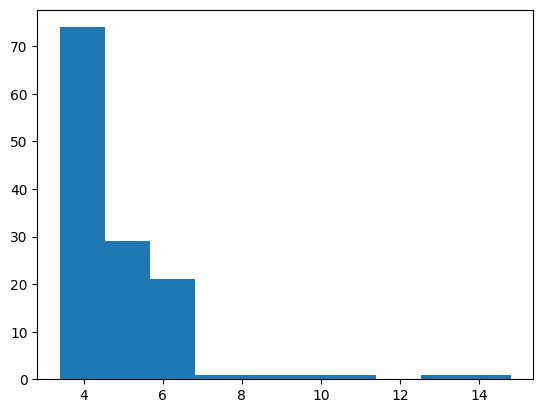

In [9]:
plt.hist(df['UNRATE'])

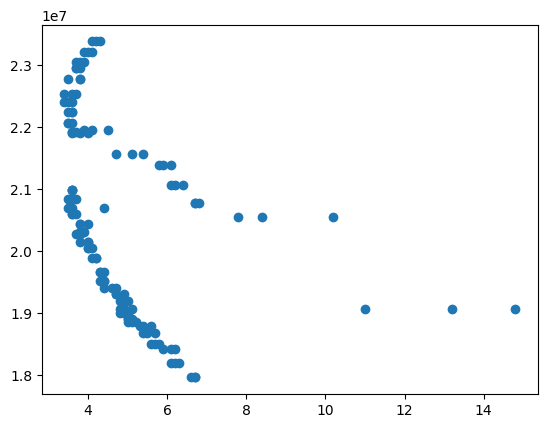

In [10]:
plt.scatter(df['UNRATE'], df['GDPC1'])

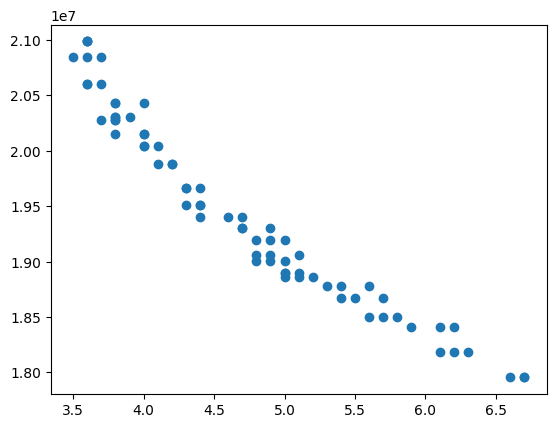

In [11]:
plt.scatter(df[df['DATE'].dt.year <=2019]['UNRATE'], df[df['DATE'].dt.year <=2019]['GDPC1'])

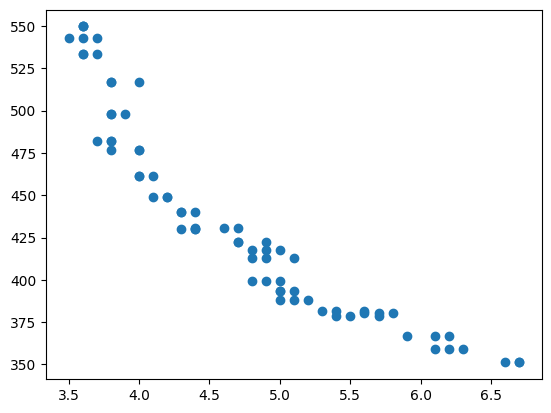

In [12]:
plt.scatter(df[df['DATE'].dt.year <=2019]['UNRATE'], df[df['DATE'].dt.year <=2019]['IP_INVESTMENT'])

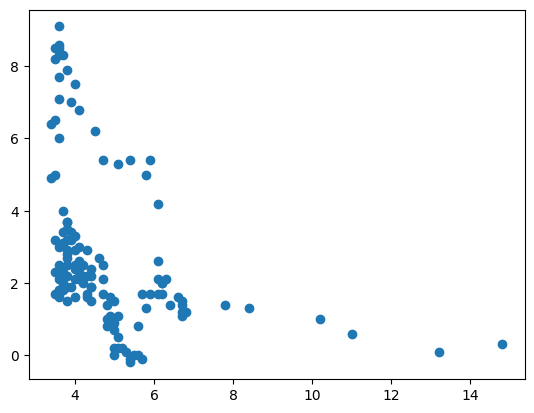

In [13]:
plt.scatter(df['UNRATE'], df['INFLATION_NOT_ADJ'])

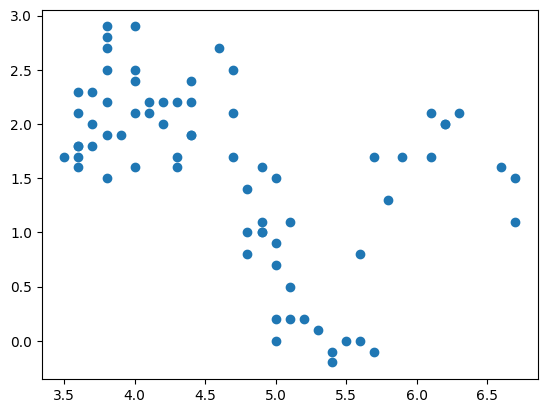

In [14]:
plt.scatter(df[df['DATE'].dt.year <=2019]['UNRATE'], df[df['DATE'].dt.year <=2019]['INFLATION_NOT_ADJ'])

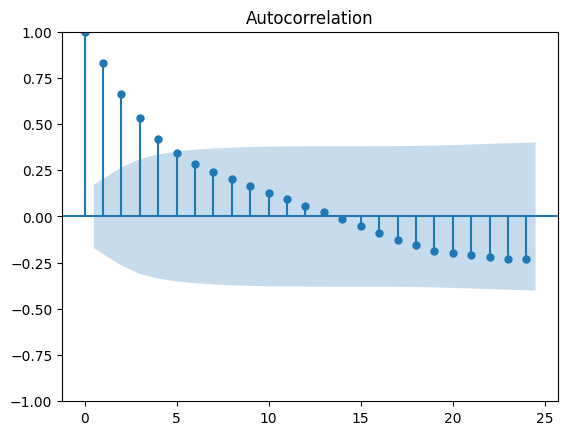

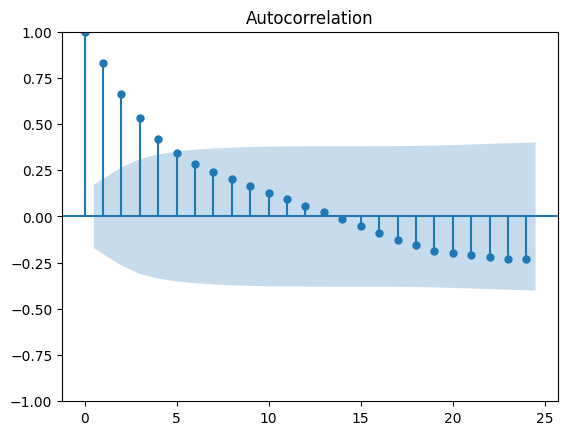

In [15]:
plot_acf(df['UNRATE'], lags=24)

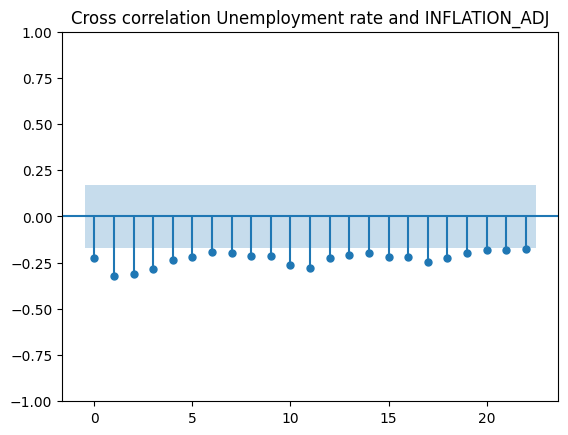

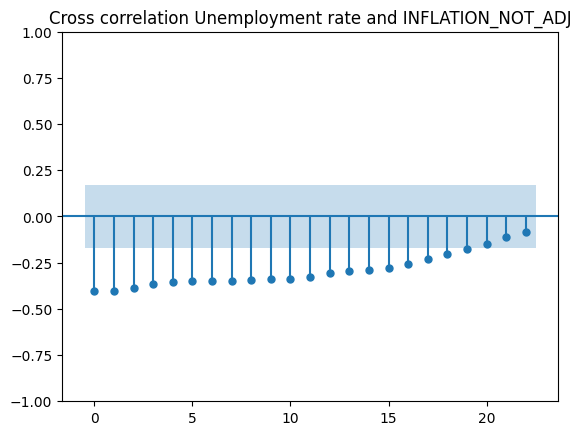

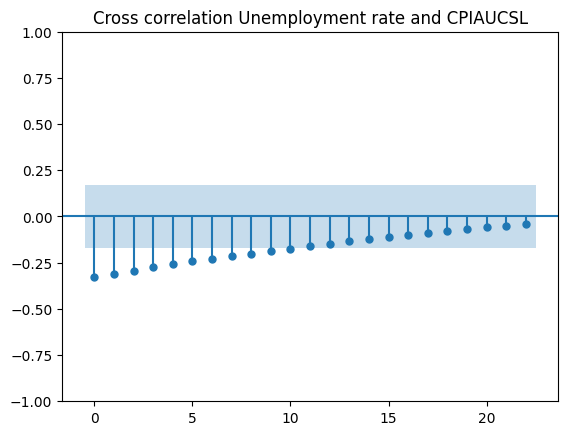

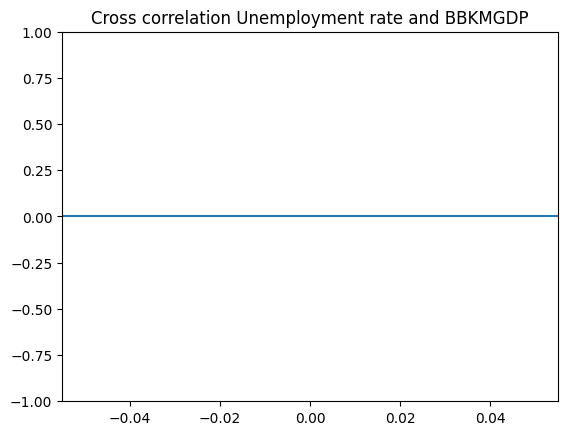

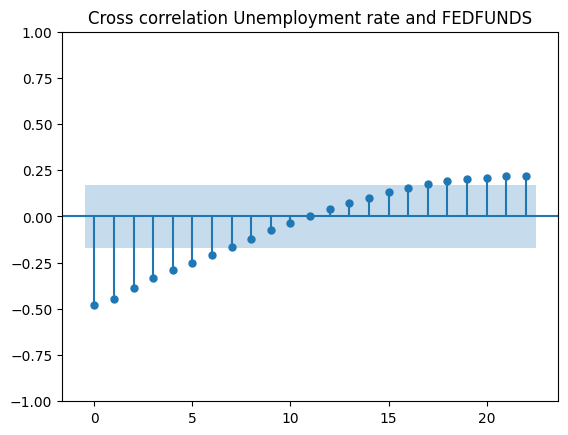

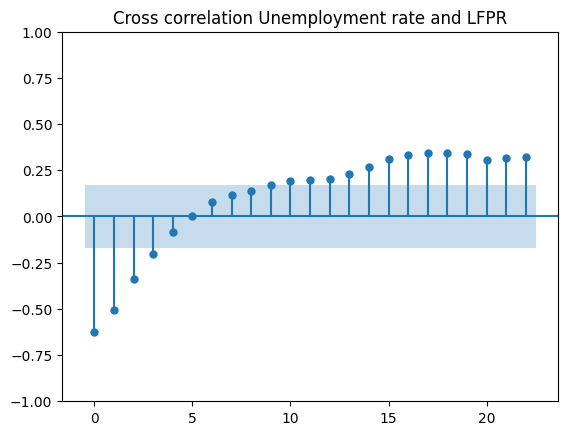

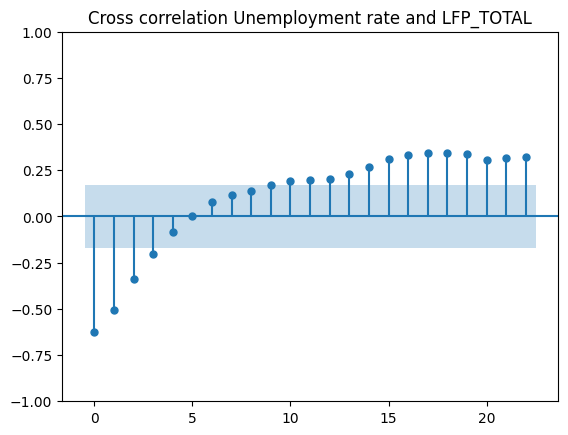

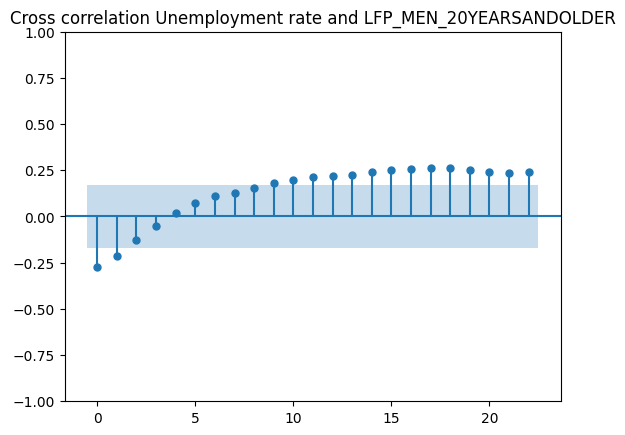

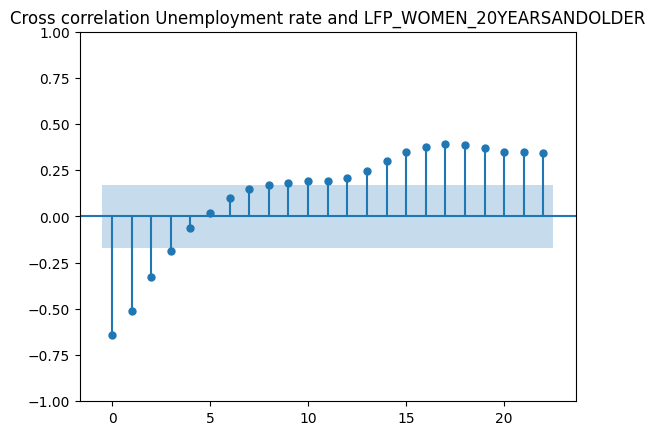

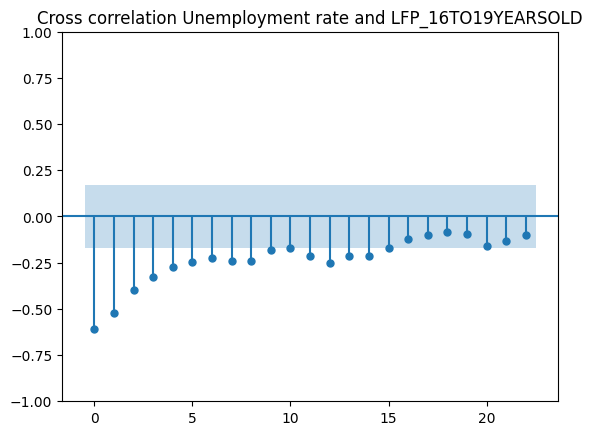

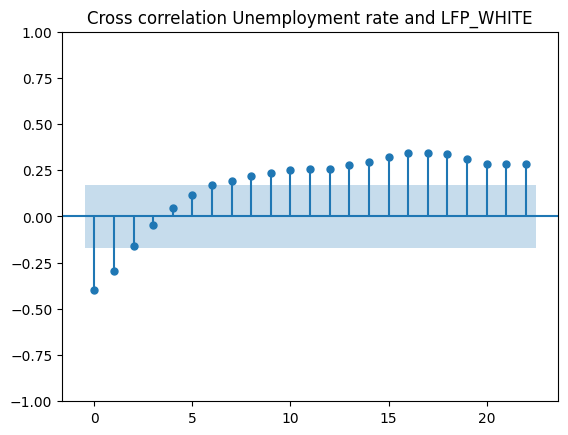

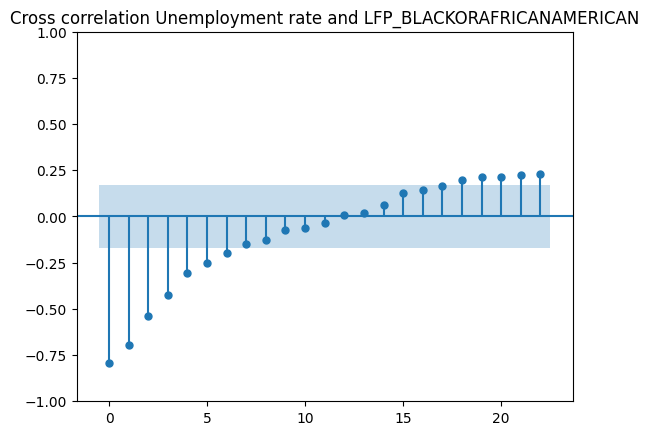

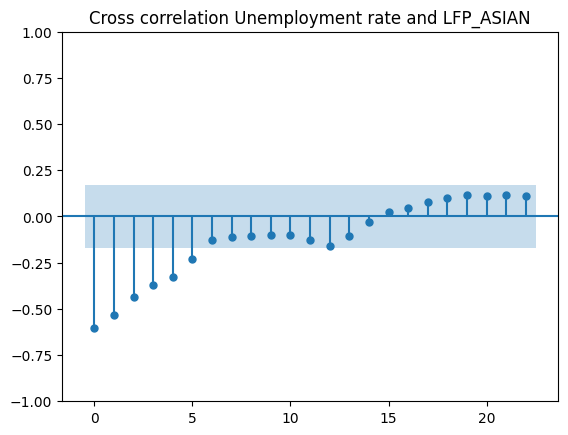

In [16]:
#Checking cross correlation between Unemployment rate and lagged predictor variables
for x in df.iloc[:,5:18].columns:
    plot_ccf(df['UNRATE'], df[x], title=f'Cross correlation Unemployment rate and {x}')

### 2. Data Preprocessing and Feature Selection
#### Box-Cox Transformation

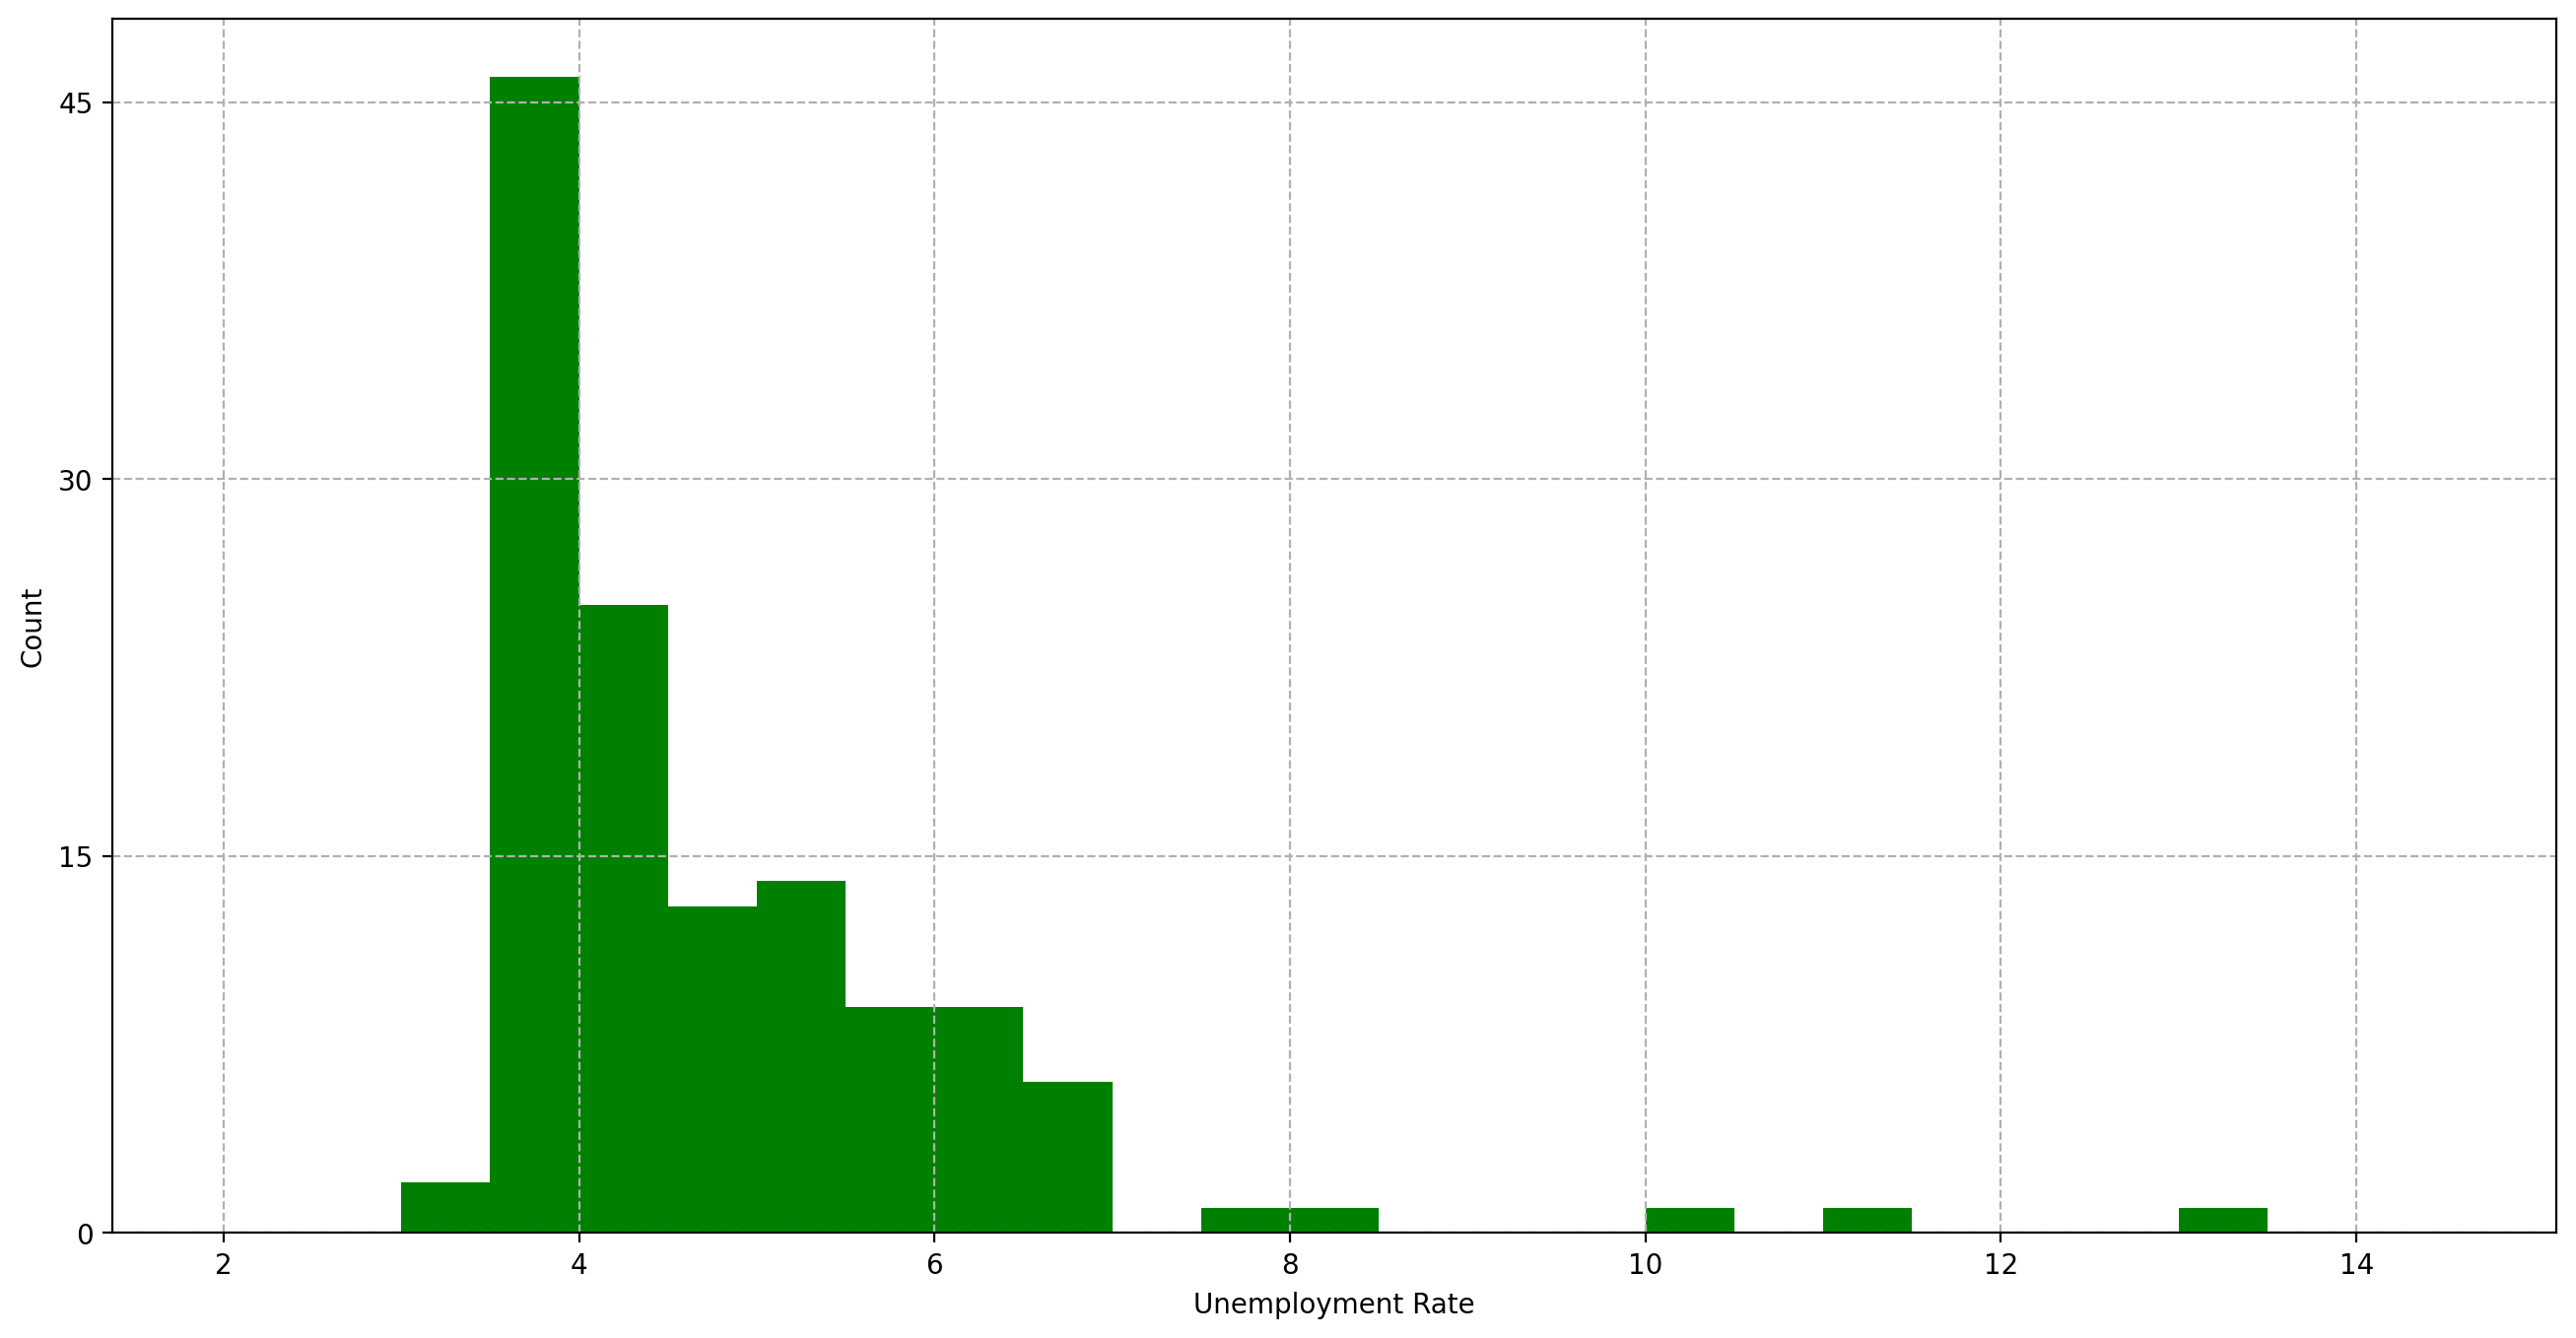

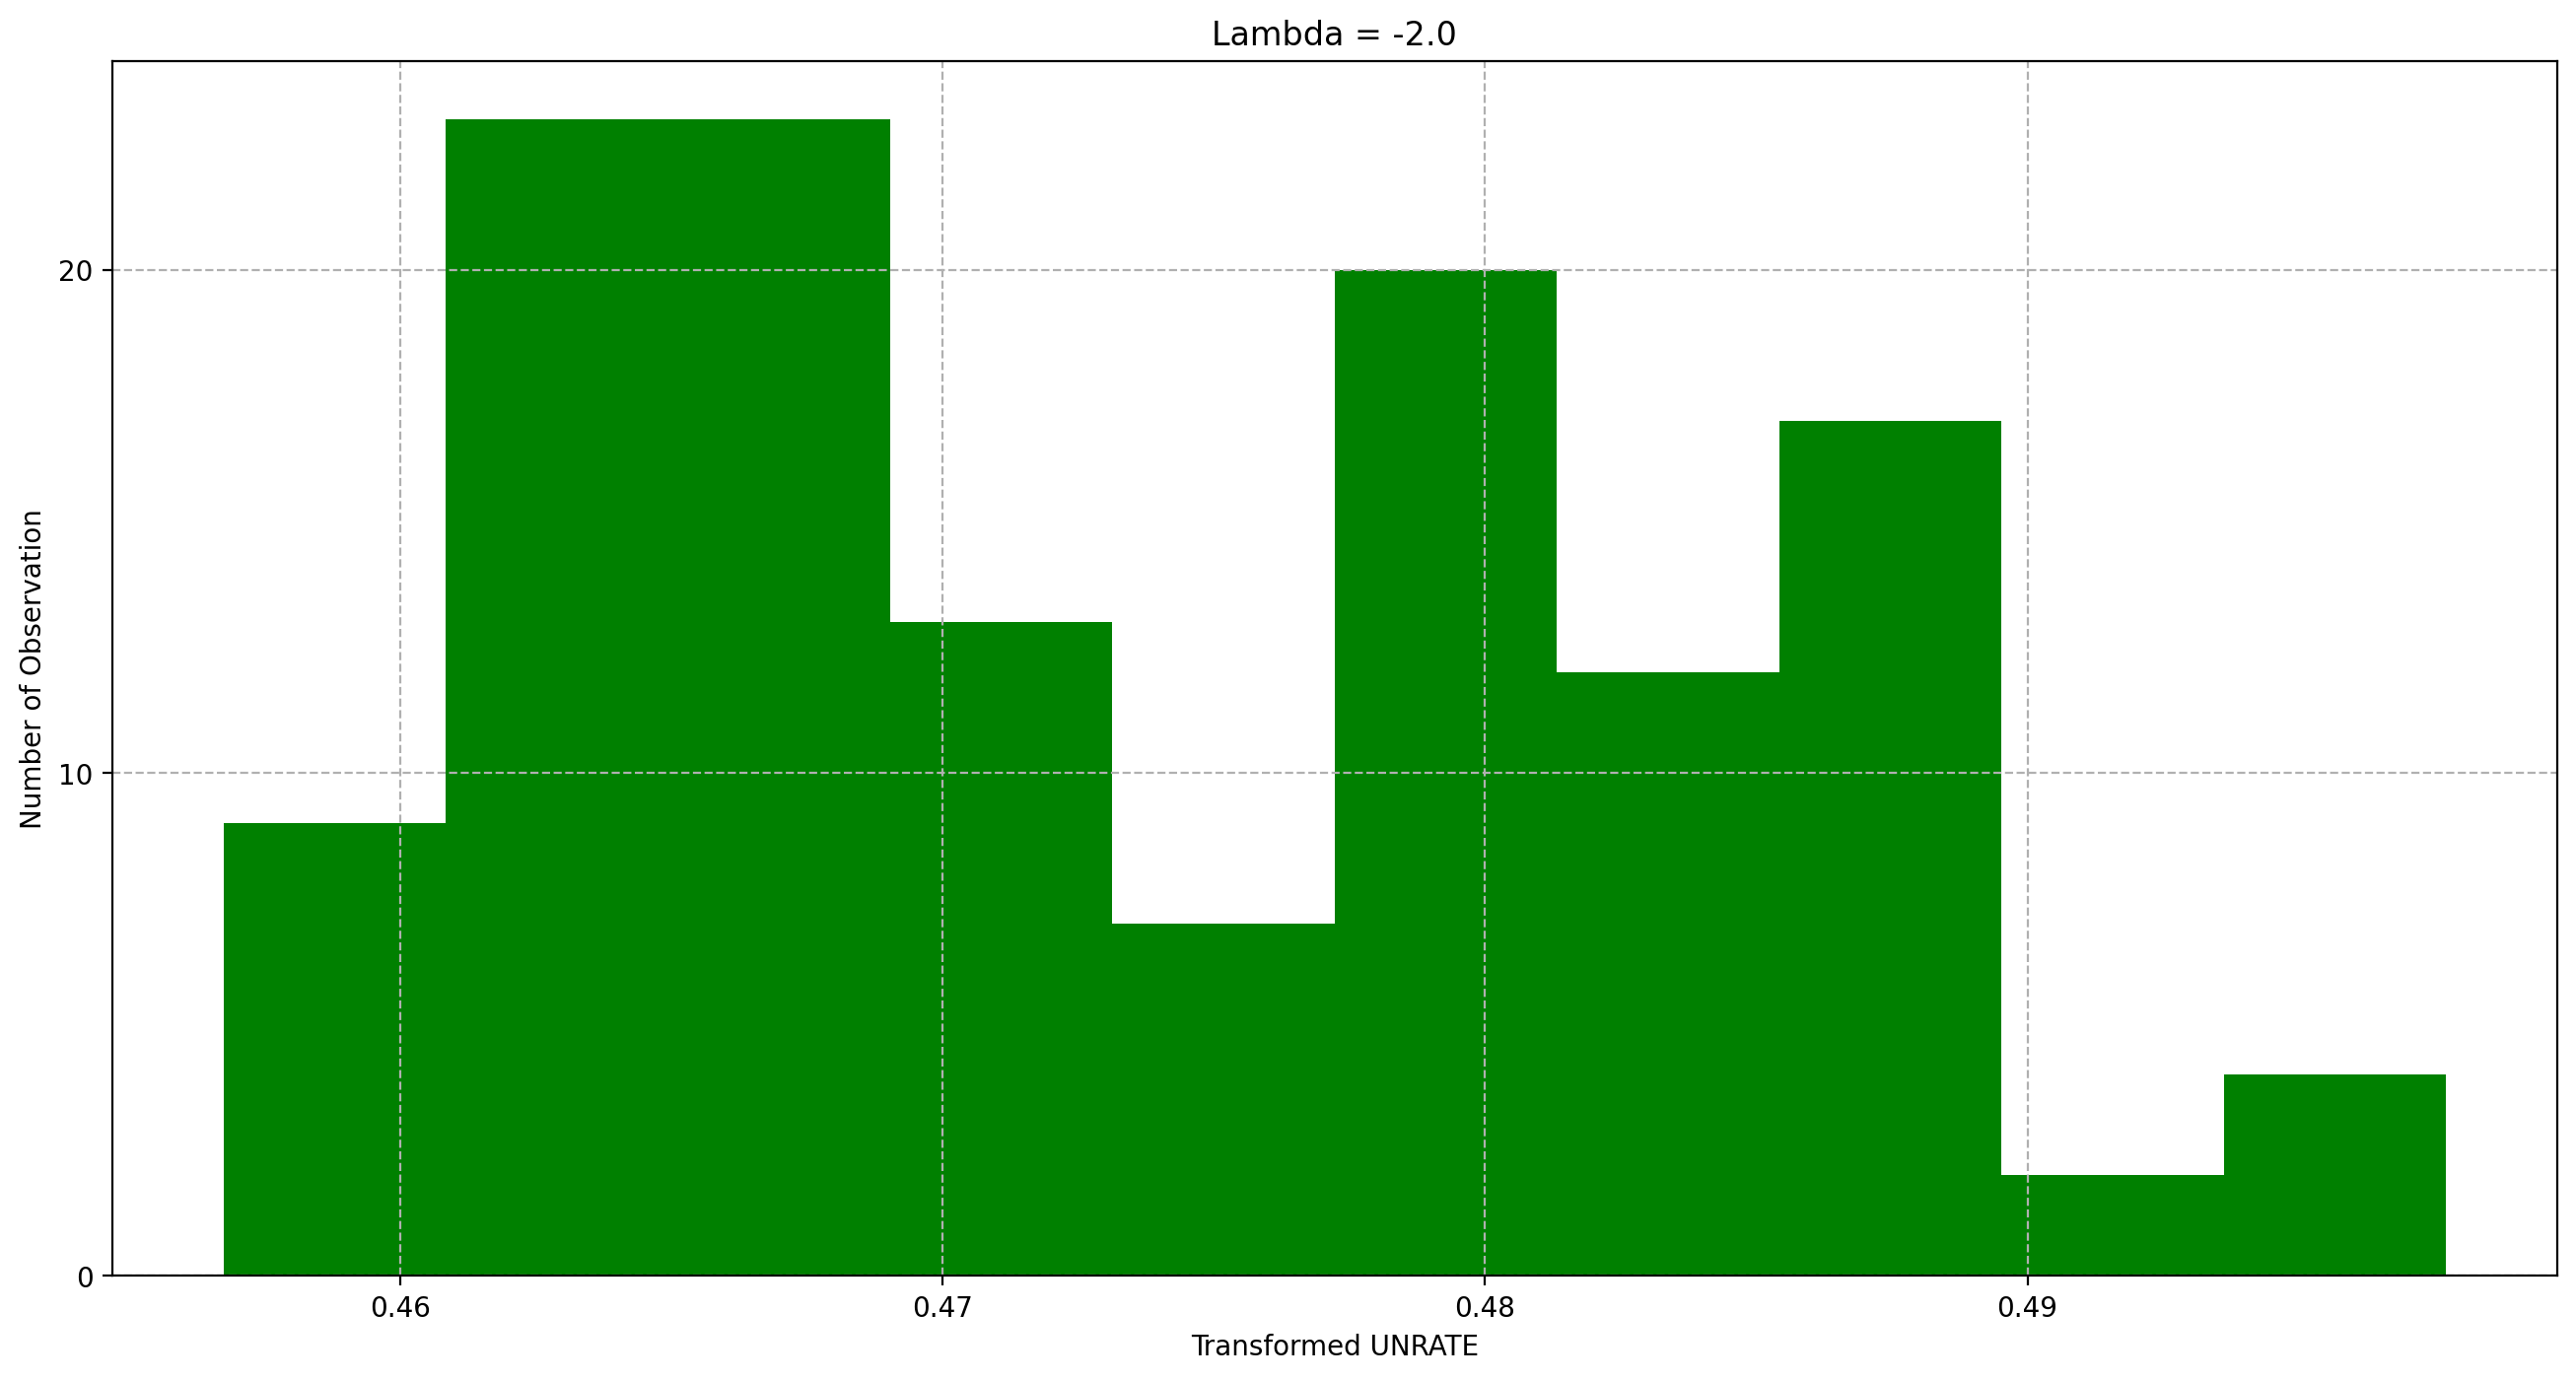

In [17]:
def BoxCoxTransform (y, p):
    if (p == 0):
        y1 = np.log(y)
    else:
        y1 = (np.power(y,p) - 1.0) / p
    return (y1)

y=df['UNRATE']
y_summary = y.describe()
# Custom histogram
custom_bins = np.arange(2, 15, 0.5)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi = 200)
ax.hist(y, bins = custom_bins, align = 'mid', color = 'green')
ax.ticklabel_format(axis = 'both', style = 'plain')
# ax.xaxis.set_major_locator(MultipleLocator(base = 5))
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}%'))
# ax.xaxis.set_minor_locator(MultipleLocator(base = 1))
ax.yaxis.set_major_locator(MultipleLocator(base = 15))
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Count')
ax.grid(axis = 'both', linestyle = 'dashed')
plt.show()
# Sort the values in ascending order
y_sorted = np.sort(y)
# Calculate the hypothetical quantiles
n_sample = y_summary['count']
y_mean = y_summary['mean']
y_stddev = y_summary['std']
n_sample=len(y)
empirical_prob = np.arange(1.0, (n_sample+1.0)) / (n_sample + 0.5)
z_quantile = norm.ppf(empirical_prob, loc = y_mean, scale = y_stddev)
empirical_prob = np.arange(1.0, (n_sample+1.0)) / (n_sample + 0.5)

result_list = []

for power_lambda in np.arange(-2.0, 2.1, 0.5):
    y1 = y.apply(BoxCoxTransform, p = power_lambda)
    y1_sorted = np.sort(y1)
    y1_mean = np.mean(y1)
    y1_stddev = np.std(y1, ddof = 1)
    z_quantile = norm.ppf(empirical_prob, loc = y1_mean, scale = y1_stddev)
    pearson_corr = np.corrcoef(y1_sorted, z_quantile)[0,1]
    dist_ideal = np.mean(np.abs(y1_sorted - z_quantile)) / y1_stddev
    shapiro_test = shapiro(y1)
    anderson_test = anderson(y1, dist = 'norm')
    result_list.append([power_lambda, pearson_corr, dist_ideal, shapiro_test[0],
    anderson_test[0]])
result_df = pd.DataFrame(result_list, columns = ['Power', 'Corr', 'MAD','Shapiro', 'Anderson'])

power_lambda =  result_df.iloc[result_df['MAD'].idxmin()]['Power']
y1 = y.apply(BoxCoxTransform, p = power_lambda)
y1_sorted = np.sort(y1)
y1_mean = np.mean(y1)
y1_stddev = np.std(y1, ddof = 1)
z_quantile = norm.ppf(empirical_prob, loc = y1_mean, scale = y1_stddev)

custom_bins = np.arange(0.45,0.5,0.005)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi = 200)
ax.hist(y1, align='mid', color='green')  # Use custom bins
ax.ticklabel_format(axis='both', style='plain')

ax.xaxis.set_major_locator(MultipleLocator(base=0.01))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_minor_locator(MultipleLocator(base=0.01))

ax.yaxis.set_major_locator(MultipleLocator(base=10))
ax.set_title('Lambda = ' + str(power_lambda))
ax.set_xlabel('Transformed UNRATE')
ax.set_ylabel('Number of Observation')
ax.grid(axis='both', linestyle='dashed')
plt.show()

In [18]:
pearson_corr = np.corrcoef(y1_sorted, z_quantile)[0,1]
dist_ideal = np.mean(np.abs(y1_sorted - z_quantile))
shapiro_test = shapiro(y1)
anderson_test = anderson(y1, dist = 'norm')

print(pearson_corr)
print(dist_ideal)
print(shapiro_test)
print(anderson_test)

0.9782620789888804
0.0018000783339534327
ShapiroResult(statistic=0.9485281965740976, pvalue=8.750301391717689e-05)
AndersonResult(statistic=2.201062406563267, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.473746062082626, scale=0.010517007244603237)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [19]:
df['UNRATE']=y1.astype('float')

#### Creating dummy variables for the year

In [20]:
#dummies=pd.get_dummies(df['DATE'].dt.year.astype('category'),dtype='float')
dummies = pd.get_dummies(df['DATE'].dt.year.astype('category'), dtype='float')
reference_year = 2024
dummies = dummies.drop(columns=[reference_year], errors='ignore')
df = pd.concat([df, dummies], axis=1)
df.columns = df.columns.astype(str)

#### Set up the dataset for the model

In [21]:
X_train=df.iloc[0:127,3:30].drop(columns= ['CPIAUCSL','LFP_TOTAL','LFP_MEN_20YEARSANDOLDER','LFP_WOMEN_20YEARSANDOLDER','LFP_16TO19YEARSOLD',
                                           'LFP_WHITE','LFP_BLACKORAFRICANAMERICAN','LFP_ASIAN','LFP_HISPANICORLATINO'])
X_train.insert(0,'Intercept',1.0)
#Predictors are 2 period lagged compared to the unemployment rate

In [22]:
y_train=df['UNRATE'].iloc[2:129].reset_index().drop(columns='index')['UNRATE']
y_train

,UNRATE
0,0.4888616618
1,0.4869927159
2,0.4874023684
3,0.4865627519
4,0.4869927159
...,...
122,0.4687500000
123,0.4702558001
124,0.4729583559
125,0.4716553288


#### Backward Selection

In [23]:
def takeFSig(s):
    return s[6]
remove_threshold = 0.1
q_show_diary = True
step_diary=[]
var_in_model = X_train.columns.tolist()
candidate_name = df.iloc[:,3:18].columns.tolist()
candidate_count=len(X_train.columns.tolist())-1
X_train_column = X_train.columns
n_sample=126
result_list = Regression.LinearRegression(X_train, y_train)
m1 = len(result_list[5])
# residual_variance = result_list[2] and residual_df = result_list[3]
SSE1 = result_list[2] * result_list[3]
step_diary.append([0, 'None', SSE1, m1] + 4 * [np.nan])
# Backward Selection Steps
for iStep in range(candidate_count):
    FTest = []
    for pred in candidate_name:
        drop_cols = [col for col in X_train_column if pred in col]
        X = X_train.drop(columns = drop_cols)
        result_list = Regression.LinearRegression(X, y_train)
        m0 = len(result_list[5])
        SSE0 = result_list[2] * result_list[3]
        df_numer = m1 - m0
        df_denom = n_sample - m1
        if (df_numer > 0 and df_denom > 0):
            FStat = ((SSE0 - SSE1) / df_numer) / (SSE1 / df_denom)
            FSig = f.sf(FStat, df_numer, df_denom)
            FTest.append([pred, SSE0, m0, FStat, df_numer, df_denom, FSig])
# Show F Test results for the current step
    if (q_show_diary):
        print('\n===== F Test Results for the Current Backward Step =====')
        print('Step Number: ', iStep)
        print('Step Diary:')
        print('[Variable Candidate | Residual Sum of Squares | N Non-Aliased Parameters | F Stat | F DF1 | F DF2 | F Sig]')
        for row in FTest:
            print(row)
    FTest.sort(key = takeFSig, reverse = True)
    FSig = takeFSig(FTest[0])
    if (FSig >= remove_threshold):
        remove_var = FTest[0][0]
        SSE1 = FTest[0][1]
        m1 = FTest[0][2]
        step_diary.append([iStep+1] + FTest[0])
        drop_cols = [col for col in X_train_column if remove_var in col]
        X_train = X_train.drop(columns = drop_cols)
        X_train_column = X_train.columns
        print(remove_var)
        var_in_model.remove(remove_var)
        candidate_name.remove(remove_var)
    else:
        break
backward_summary = pd.DataFrame(step_diary, columns = ['Step', 'Variable Removed', 'Residual Sum of Squares', 'N Non-Aliased Parameters', 'F Stat', 'F DF1',
'F DF2', 'F Sig'])
backward_summary


===== F Test Results for the Current Backward Step =====
Step Number:  0
Step Diary:
[Variable Candidate | Residual Sum of Squares | N Non-Aliased Parameters | F Stat | F DF1 | F DF2 | F Sig]
['IP_INVESTMENT', 0.0007479497035845667, 17, 6.521739413833623, 1, 108, 0.012051298899456725]
['GDPC1', 0.0007054875161158736, 17, 0.020174475809412312, 1, 108, 0.8873155011915408]
['INFLATION_ADJ', 0.0007054509853038683, 17, 0.014581088830306966, 1, 108, 0.9041116946742942]
['INFLATION_NOT_ADJ', 0.0009933914739654365, 17, 44.10236593740559, 1, 108, 1.298404559536223e-09]
['BBKMGDP', 0.0007239496030214459, 17, 2.8469826094347286, 1, 108, 0.09443182433809764]
['FEDFUNDS', 0.0007075379215343242, 17, 0.3341207129683298, 1, 108, 0.5644459793169523]
['LFPR', 0.0007054008428592851, 17, 0.006903567274236531, 1, 108, 0.9339356045122207]
LFPR

===== F Test Results for the Current Backward Step =====
Step Number:  1
Step Diary:
[Variable Candidate | Residual Sum of Squares | N Non-Aliased Parameters | F St

,Step,Variable Removed,Residual Sum of Squares,N Non-Aliased Parameters,F Stat,F DF1,F DF2,F Sig
0,0,None,0.0007053558,18,NaN,NaN,NaN,NaN
1,1,LFPR,0.0007054008,17,0.0069035673,1.0000000000,108.0000000000,0.9339356045
2,2,GDPC1,0.0007054895,16,0.0136992896,1.0000000000,109.0000000000,0.9070406058
3,3,INFLATION_ADJ,0.0007055748,15,0.0132952076,1.0000000000,110.0000000000,0.9084137201
4,4,FEDFUNDS,0.0007084832,14,0.4575561601,1.0000000000,111.0000000000,0.5001754096


### 3. Model
#### Linear Regression Results

In [24]:
result_list = Regression.LinearRegression(X_train, y_train)

In [25]:
result_list[0]

,Estimate,Standard Error,t,Significance,Lower 95 CI,Upper 95 CI
Intercept,0.5569947248,0.0140678276,39.5935136773,0.0000000000,0.5291238211,0.5848656286
IP_INVESTMENT,-0.0000997742,0.0000178529,-5.5886780883,0.0000001606,-0.0001351441,-0.0000644044
INFLATION_NOT_ADJ,-0.0024431521,0.0003036553,-8.0458082838,0.0000000000,-0.0030447479,-0.0018415562
BBKMGDP,-0.0000430872,0.0000229194,-1.8799398797,0.0626915718,-0.0000884947,0.0000023204
2014,-0.0306074427,0.0077298950,-3.9596194702,0.0001316538,-0.0459217589,-0.0152931266
2015,-0.0371164531,0.0072942728,-5.0884377766,0.0000014510,-0.0515677230,-0.0226651831
2016,-0.0339680477,0.0068530399,-4.9566393931,0.0000025423,-0.0475451559,-0.0203909396
2017,-0.0356960895,0.0064725368,-5.5150076117,0.0000002236,-0.0485193523,-0.0228728268
2018,-0.0365938138,0.0057524067,-6.3614788741,0.0000000044,-0.0479903689,-0.0251972586
2019,-0.0372434621,0.0047516443,-7.8380156572,0.0000000000,-0.0466573264,-0.0278295978


#### Model Diagnostics

In [26]:
# Calculate Diagnostic Values
y_predicted = X_train.dot(result_list[0]['Estimate'])
corr_y_prediction = Regression.PearsonCorrelation(y_train, y_predicted)
R_Square = np.square(corr_y_prediction)
print(R_Square)

0.9486751119857906


In [27]:
cols = ['IP_INVESTMENT','BBKMGDP','INFLATION_NOT_ADJ','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

In [28]:
#Checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = cols
vif_data["VIF"] = [variance_inflation_factor(X_train[cols].values, i) for i in range(len(cols))]

In [29]:
vif_data

,feature,VIF
0,IP_INVESTMENT,18.5345846507
1,BBKMGDP,1.0936041332
2,INFLATION_NOT_ADJ,23.1399183099
3,2014,1.3631163004
4,2015,1.7531802980
5,2016,1.4870555293
6,2017,1.5355455054
7,2018,1.6602918562
8,2019,1.7937223772
9,2020,2.0758208986


In [30]:
covb=result_list[1]
residual_variance = result_list[2]
residual_df = result_list[3]
model_df = len(result_list[5])
XtX_ginv = covb / residual_variance
H_matrix = X_train.dot(XtX_ginv).dot(X_train.transpose())
leverage = pd.Series(np.diag(H_matrix), index = H_matrix.index, name ='leverage')

In [31]:
y_residual = y_train - y_predicted
y_std_residual = y_residual / np.sqrt(residual_variance * (1.0 - leverage))
y_residual_deleted = y_residual / (1.0 - leverage)
y_residual_deleted_direct = []
residual_variance_deleted = []
for i in range(len(y_train)):
    X_drop_i = X_train.drop(index = i)
    y_drop_i = y_train.drop(index = i)
    result_list = Regression.LinearRegression(X_drop_i, y_drop_i)
    residual_variance_deleted.append(result_list[2])
    y_prediction_i = X_train.loc[i].dot(result_list[0]['Estimate'])
    y_residual_deleted_direct.append(y.loc[i] - y_prediction_i)
y_student_residual = y_residual / np.sqrt(residual_variance_deleted * (1.0 -leverage))
diagnostic_df = pd.DataFrame({'Response': y_train,
                                  'Prediction': y_predicted,
                                  'Leverage': leverage,
                                  'Simple Residual': y_residual,
                                  'Standardized Residual': y_std_residual,
                                  'Deleted Residual': y_residual_deleted,
                                  'Studentized Residual': y_student_residual})

In [32]:
rmse = np.sqrt(1/n_sample*sum((y_train-y_predicted)**2))
rmse

0.002371261865707996

#### Plot Different Residuals and Leverage

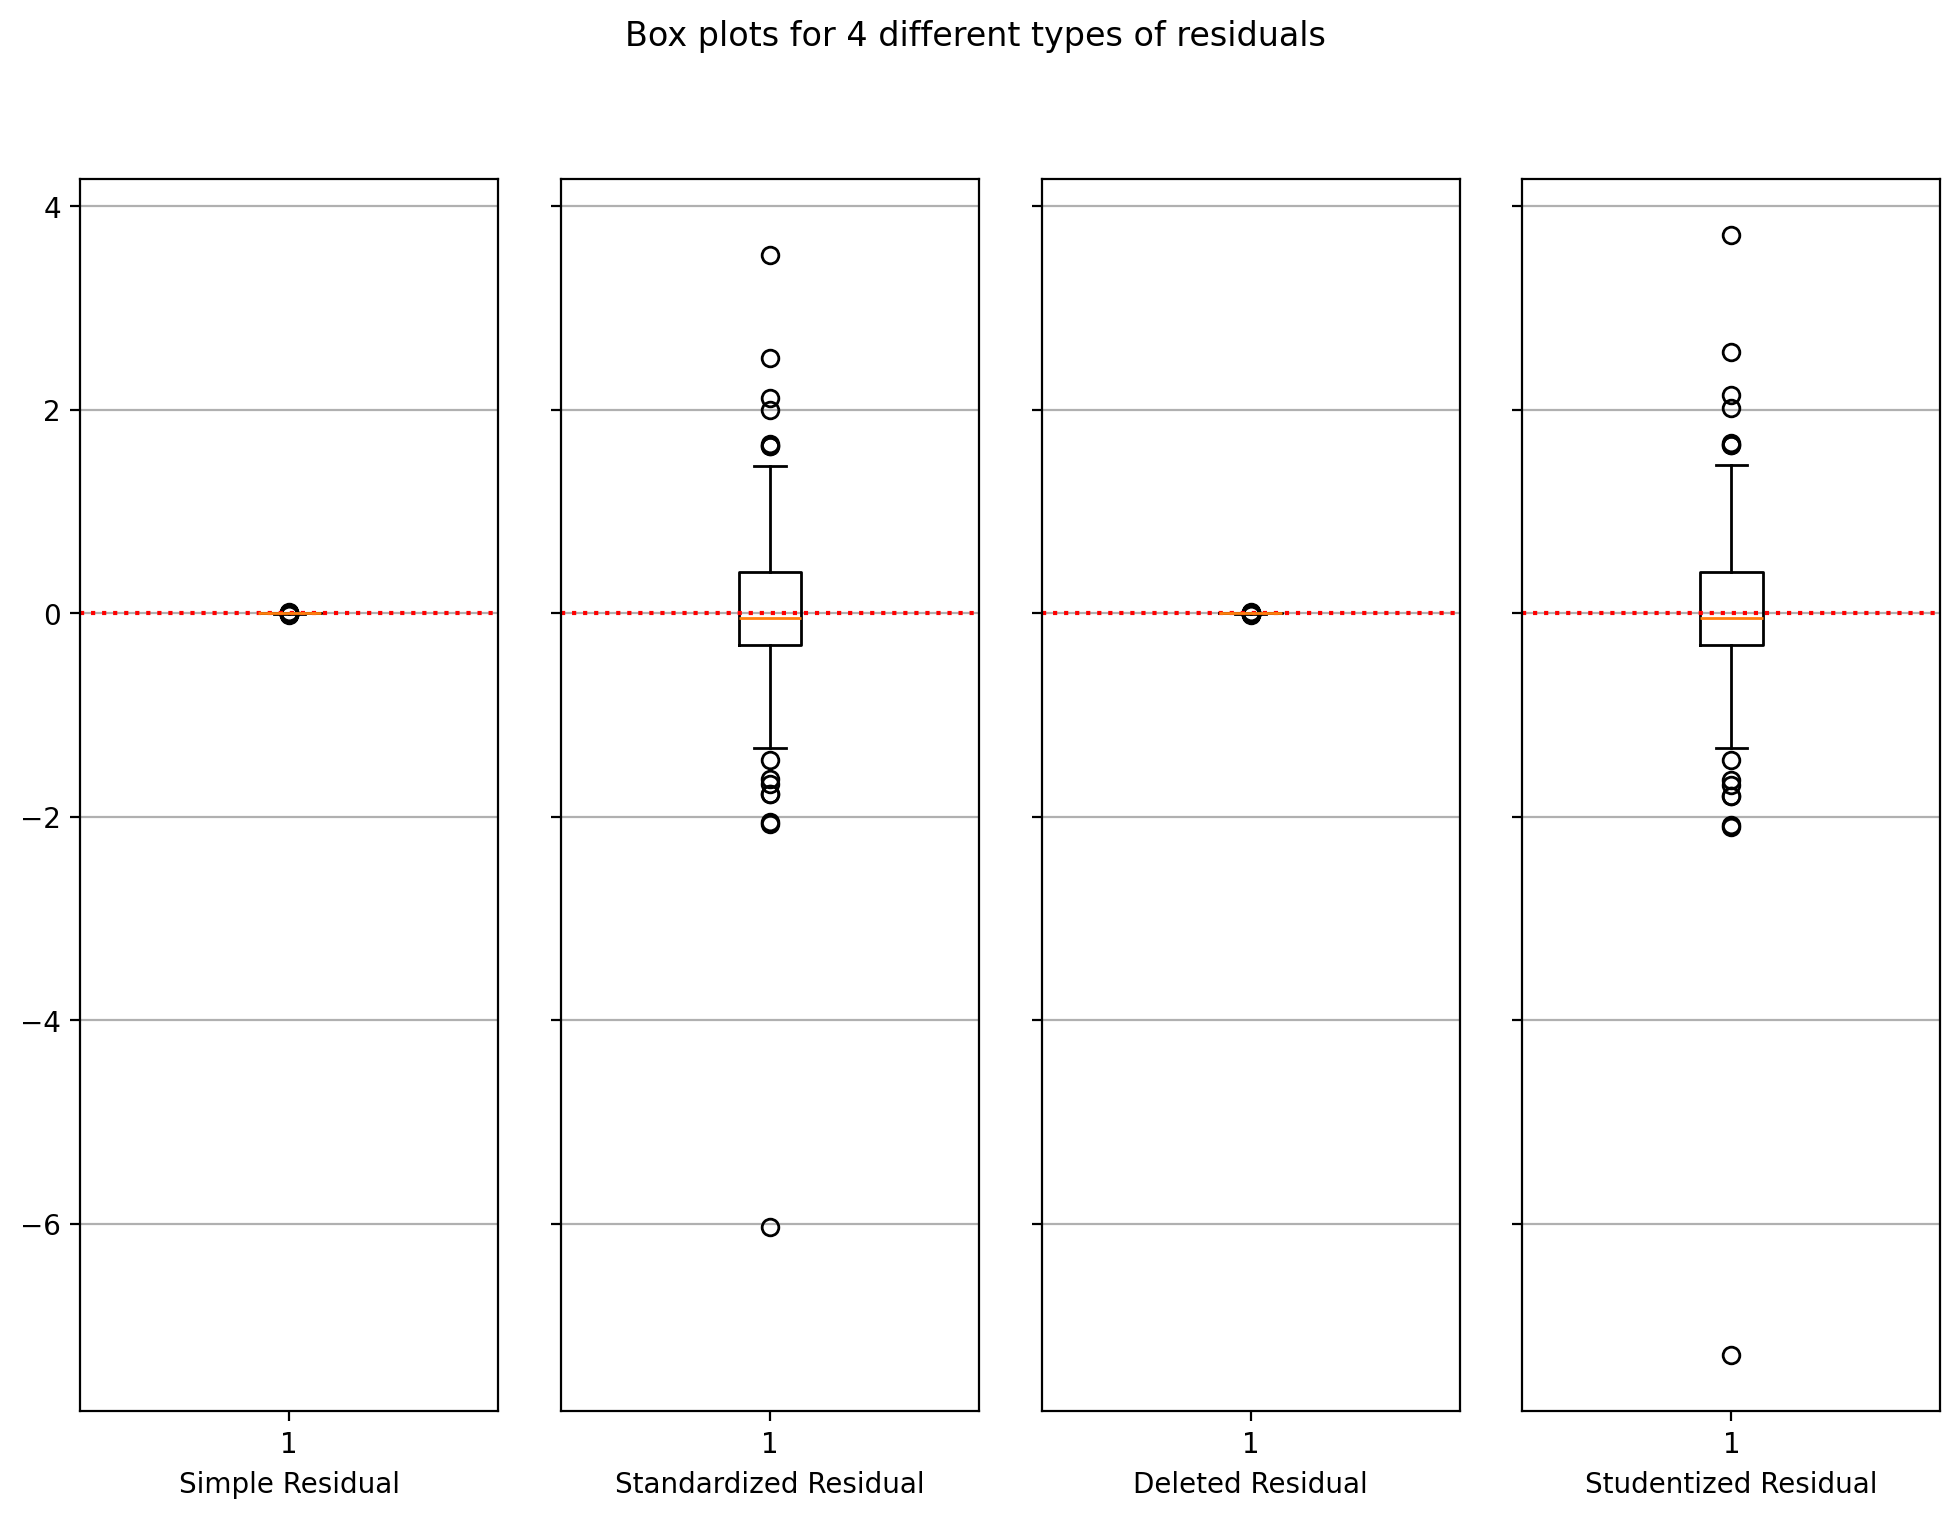

In [33]:
stats = diagnostic_df.columns
fig, axs = plt.subplots(1, 4, figsize = (12,8), sharey = True, dpi = 200)
plt.subplots_adjust(wspace = 0.15)
for j in range(4):
    col = stats[j+3]
    ax = axs[j]
    ax.boxplot(diagnostic_df[col], vert = True)
    ax.axhline(0.0, color = 'red', linestyle = ':')
    # ax.set_yticks(np.arange(-0.02,0.03,0.01))
    ax.set_xlabel(col)
    ax.grid(axis = 'y')
plt.suptitle('Box plots for 4 different types of residuals ')
plt.show()

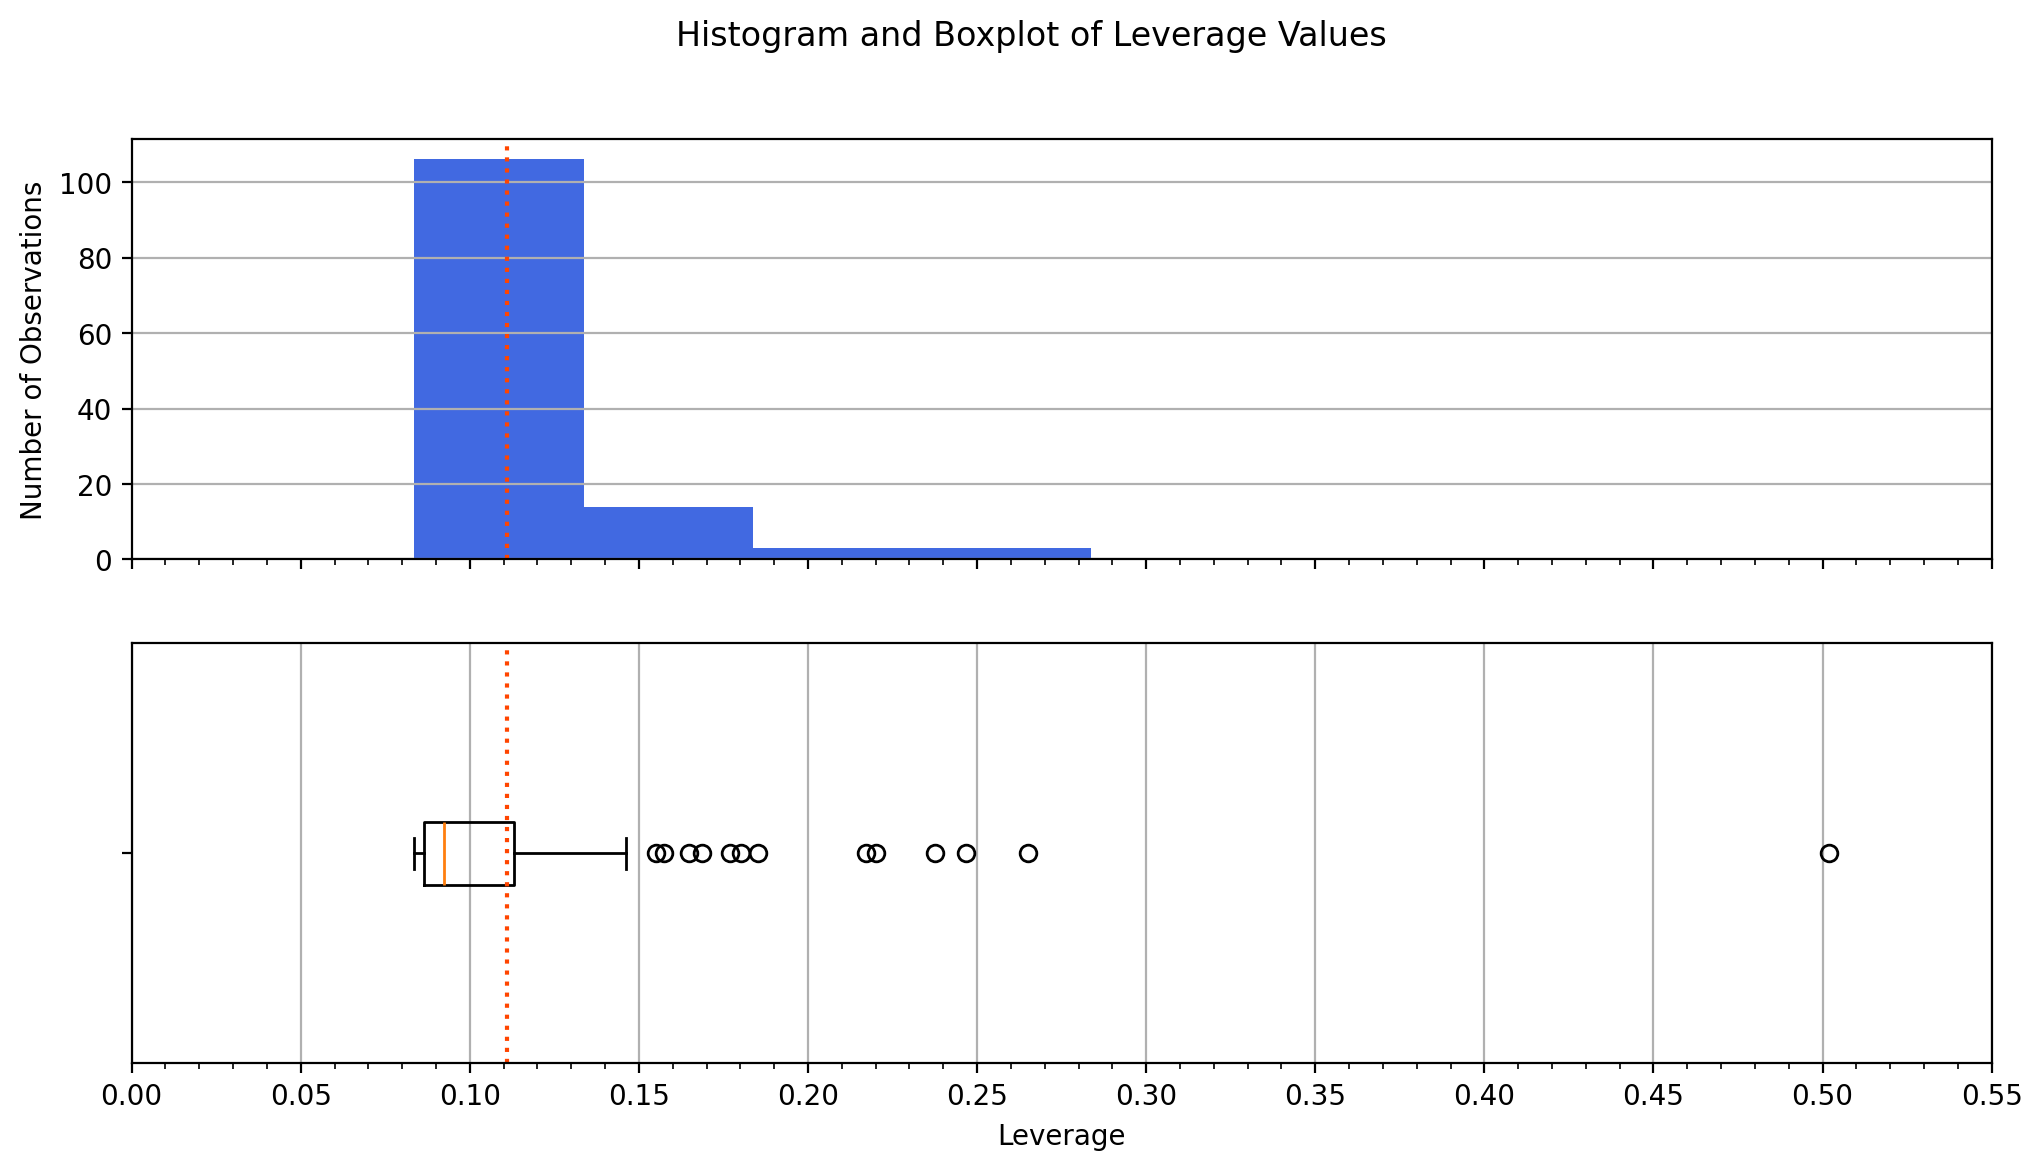

In [34]:
#plot
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, dpi = 200, sharex = True,figsize = (12,6))
ax0.hist(leverage, bins = np.arange(leverage.min(), leverage.max(), 0.05), color = 'royalblue')
ax0.axvline(model_df / n_sample, color = 'orangered', linestyle = ':')
ax0.set_xlabel('')
ax0.set_ylabel('Number of Observations')
ax0.yaxis.grid(True)
ax1.boxplot(leverage, vert = False)
ax1.axvline(model_df / n_sample, color = 'orangered', linestyle = ':')
ax1.set_xlabel('Leverage')
ax1.set_ylabel('')
ax1.set_xticks(np.arange(0, 0.6, 0.05))
ax1.xaxis.set_major_locator(MultipleLocator(base = 0.05))
ax1.xaxis.set_minor_locator(MultipleLocator(base = 0.01))
ax1.yaxis.set_major_locator(MultipleLocator(base = 1.0))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.grid(True)
plt.suptitle('Histogram and Boxplot of Leverage Values')
plt.title('')
plt.show()

In [35]:
#Identify high leverage observations
high_leverage_indx = diagnostic_df[diagnostic_df['Leverage']>=0.25].index
high_leverage=X_train.iloc[high_leverage_indx]
y_predicted[high_leverage_indx]
high_leverage

,Intercept,IP_INVESTMENT,INFLATION_NOT_ADJ,BBKMGDP,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
75,1.0000000000,549.3910000000,0.3000000000,-71.4776910991,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000
78,1.0000000000,571.7660000000,1.0000000000,45.3907003553,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000


In [36]:
#Identify Outliers
outlier_indx =diagnostic_df[abs(diagnostic_df['Standardized Residual'])>3].index
X_train.iloc[outlier_indx]

,Intercept,IP_INVESTMENT,INFLATION_NOT_ADJ,BBKMGDP,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
72,1.0000000000,558.1960000000,2.5000000000,1.4727692548,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000
73,1.0000000000,558.1960000000,2.3000000000,-12.2634357345,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000


#### Drop the highly influential observations and retrain the final model

In [37]:
#Drop outliers and retrain model
X_train=X_train.drop(outlier_indx,axis=0).drop(high_leverage_indx, axis=0)
y_train=y_train.drop(outlier_indx,axis=0).drop(high_leverage_indx, axis=0)

In [38]:
result_list = Regression.LinearRegression(X_train, y_train)

In [39]:
#dfi.export(result_list[0], 'Model_Results.png')
#result_list[0]

In [40]:
y_predicted = X_train.dot(result_list[0]['Estimate'])
y_residual=y_train-y_predicted

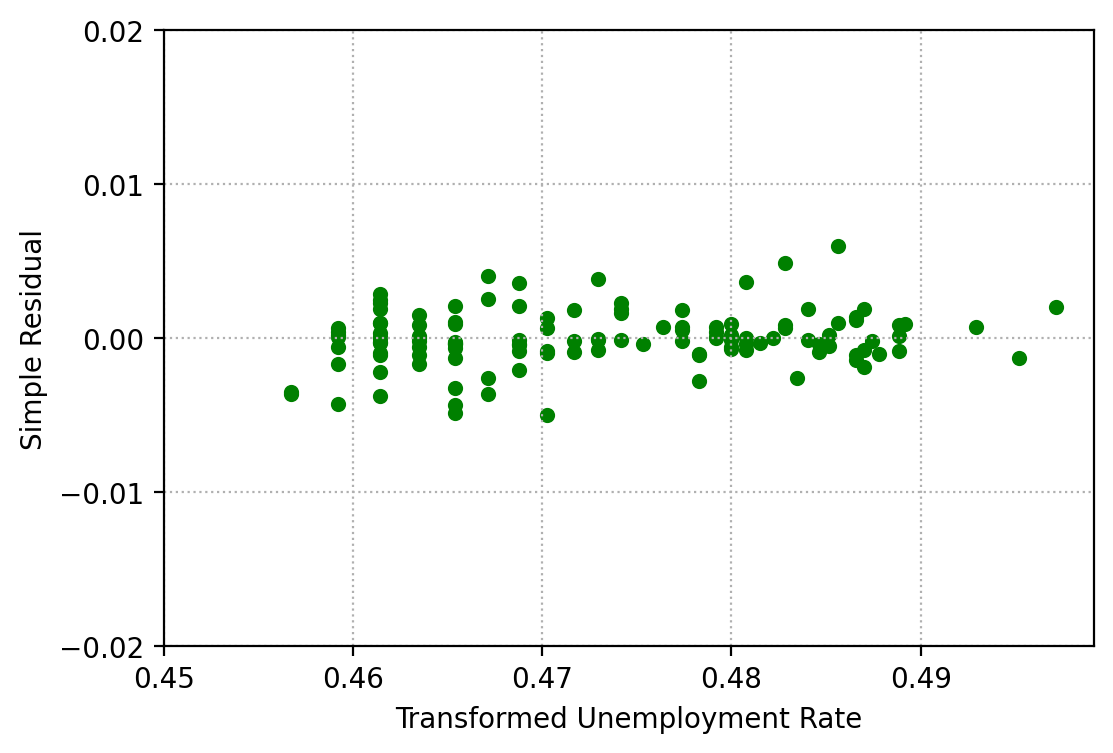

In [41]:
plt.figure(figsize = (6,4), dpi = 200)
plt.scatter(y_train, y_residual, c = 'green', s = 20, marker = 'o')
plt.xlabel('Transformed Unemployment Rate')
plt.ylabel('Simple Residual')
plt.xticks(np.arange(0.45,0.5,0.01))
plt.yticks(np.arange(-0.02,0.03,0.01))
plt.grid(axis = 'both', linestyle = 'dotted')
plt.show()

In [42]:
anderson(y_residual, dist = 'norm')

AndersonResult(statistic=1.6971731586963017, critical_values=array([0.559, 0.636, 0.763, 0.891, 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-1.4726250932324738e-15, scale=0.0018459340481969423)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [43]:
corr_y_prediction = Regression.PearsonCorrelation(y_train, y_predicted)
R_Square = np.square(corr_y_prediction)
print(R_Square, corr_y_prediction)

0.9663463882992767 0.9830291899528094


#### 4. Final Prediction of the Unemployment Rate of December 2024

In [44]:
X_test=df.loc[128:129,cols]
X_test.insert(0,'Intercept',1)
# X_test.insert(0,'Intercept',1)
y_12 = X_test.iloc[0,:].dot(result_list[0]['Estimate'])
print('The predicted unemployment rate for December 2024 is:')
final_pred = (np.exp(np.log(power_lambda*y_12+1)/power_lambda))
final_pred

The predicted unemployment rate for December 2024 is:


4.140645443113708

In [45]:
##calculating the standard errors using given the matrix formula
X_test=X_test.iloc[0,:].to_numpy()
resid_var = result_list[2]
resid_df = result_list[3]
X_mat = X_train
X_test

array([  1.          , 802.917       ,   1.3818388988,   2.4         ,   0.          ,   0.          ,   0.          ,   0.          ,   0.          ,   0.          ,   0.          ,   0.          ,   0.          ,   0.          ])

In [46]:
# Define the input data
X_test = df.loc[128:129, cols]
X_test.insert(0, 'Intercept', 1)

# Calculate y_12
y_12 = X_test.iloc[0, :].dot(result_list[0]['Estimate'])
print('The predicted unemployment rate for December 2024 is:')
final_pred = (np.exp(np.log(power_lambda*y_12+1)/power_lambda))
print(final_pred)

# Calculate the standard errors using the given matrix formula
X_test = X_test.iloc[0, :].to_numpy()
resid_var = result_list[2]
resid_df = result_list[3]
X_mat = X_train

pred_std_err = np.sqrt(resid_var) * np.sqrt(X_test @ (np.linalg.inv(X_train.T.dot(X_train))) @ X_test.T)
t_critical = t.ppf(0.975, resid_df)
pred_95_CI_lower = y_12 - t_critical * pred_std_err
pred_95_CI_upper = y_12 + t_critical * pred_std_err

# Revert Box-Cox transformation for the confidence interval
pred_95_CI_lower = (np.exp(np.log(power_lambda*pred_95_CI_lower+1)/power_lambda))
pred_95_CI_upper = (np.exp(np.log(power_lambda*pred_95_CI_upper+1)/power_lambda))

# Print the 95% confidence interval
print(f"95% Confidence Interval for Unemployment Rate is: [{pred_95_CI_lower}, {pred_95_CI_upper}]")


The predicted unemployment rate for December 2024 is:
4.140645443113708
95% Confidence Interval for Unemployment Rate is: [4.02267595732605, 4.269642139510935]


In [47]:
# Calculate R-squared
y_predicted = X_train.dot(result_list[0]['Estimate'])
corr_y_prediction = Regression.PearsonCorrelation(y_train, y_predicted)
R_Square = np.square(corr_y_prediction)
print(f"R-squared: {R_Square}")

# Calculate MSE
mse = np.mean((y_train - y_predicted)**2)
print(f"MSE: {mse}")

# Calculate RMSE (already calculated above as rmse)
print(f"RMSE: {rmse}")

# Calculate MAE
mae = np.mean(np.abs(y_train - y_predicted))
print(f"MAE: {mae}")

R-squared: 0.9663463882992767
MSE: 3.3797694817537864e-06
RMSE: 0.002371261865707996
MAE: 0.0013111358704928407
